# XGB + CV

In [109]:
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import numpy as np
import pandas as pd
import os
from collections import Counter 

from sklearn.neighbors import KNeighborsClassifier  ## KNN
from sklearn.linear_model import LogisticRegressionCV  ## logistic regression
from sklearn.svm import SVC  ## SVM

from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

import math
import string
import re

import xgboost

from preprocess import preprocess
plt.rcParams['figure.figsize'] = [10, 8]

# 鐵達尼號資料集

In [110]:
df = pd.read_csv('train.csv')
df = preprocess(df)
# df    ## 891 rows × 18 columns
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Has_Cabin,Age_Cat,Fare_log2,Fare_Cat,Name_Length,Name_With_Special_Char,Family_Size,Title
0,1,0,3,1,22.0,1,0,2,0,0,0,1,2.857981,0,23,0,1,1
1,2,1,1,0,38.0,1,0,5,3,2,1,2,6.155492,5,51,1,1,3
2,3,1,3,0,26.0,0,0,7,0,0,0,1,2.986411,0,22,0,0,2
3,4,1,1,0,35.0,1,0,1,3,0,1,2,5.730640,4,44,1,1,3
4,5,0,3,1,35.0,0,0,1,0,0,0,2,3.008989,0,24,0,0,1


In [111]:
X = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Cabin', 'Embarked', 'Has_Cabin', 'Age_Cat', 'Fare_log2',
       'Fare_Cat', 'Name_Length', 'Name_With_Special_Char', 'Family_Size',
       'Title']].values
Y = df['Survived'].values

In [112]:
from sklearn.model_selection  import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size =0.3, random_state=1212)
# test_size =0.3 (train 和 test data 分切成 7:3)
## 一般如果測試資料集超過1000筆就可以了，所以比率不會設這麼高

print(X_train.shape)  ## (445, 17)
print(X_valid.shape)  ## (446, 17) 
print(Y_train.shape)  ## (445,)
print(Y_valid.shape)  ## (446,)

(623, 17)
(268, 17)
(623,)
(268,)


In [113]:
# 檢測每一演算法的 accuracy

def get_accuracy(clf):
    #=============your works starts===============#
    
    clf = clf()
    clf = clf.fit(X_train, Y_train)
    y_pred =  clf.predict(X_valid)
    accuracy = np.sum(y_pred == Y_valid)/len(y_pred)
    
    #==============your works ends================#
    return accuracy

print('SVM: ', get_accuracy(SVC))
print('DecisionTree: ', get_accuracy(DecisionTreeClassifier))
print('RandomForest: ', get_accuracy(RandomForestClassifier))
print('AdaBoost: ', get_accuracy(AdaBoostClassifier))  ## Boosting的演算法
print('XGB: ', get_accuracy(XGBClassifier))

# SVM:  0.609865470852
# DecisionTree:  0.764573991031
# RandomForest:  0.795964125561
# AdaBoost:  0.784753363229
# XGB:  0.80269058296

SVM:  0.6455223880597015
DecisionTree:  0.7649253731343284


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest:  0.8507462686567164
AdaBoost:  0.7910447761194029
XGB:  0.8432835820895522


In [114]:
# xgboost accuracy 較高

In [115]:
# random_state參數 

def get_accuracy(clf, X_train, X_valid, Y_train, Y_valid):

    clf = clf()
    clf = clf.fit(X_train, Y_train)
    y_pred =  clf.predict(X_valid)
    accuracy = np.sum(y_pred == Y_valid)/len(y_pred)
    
    return accuracy

for i in np.random.randint(0, 10000, 100):
    X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size =0.3, random_state=i)
    print(i)
    print('SVM: ', get_accuracy(SVC, X_train, X_valid, Y_train, Y_valid))
    print('DecisionTree: ', get_accuracy(DecisionTreeClassifier, X_train, X_valid, Y_train, Y_valid))
    print('RandomForest: ', get_accuracy(RandomForestClassifier, X_train, X_valid, Y_train, Y_valid))
    print('AdaBoost: ', get_accuracy(AdaBoostClassifier, X_train, X_valid, Y_train, Y_valid))  
    print('XGB: ', get_accuracy(XGBClassifier, X_train, X_valid, Y_train, Y_valid))
    print('===================')


2153
SVM:  0.5932835820895522
DecisionTree:  0.7126865671641791
RandomForest:  0.8022388059701493


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8171641791044776
XGB:  0.8022388059701493
9542


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6194029850746269
DecisionTree:  0.7425373134328358
RandomForest:  0.832089552238806
AdaBoost:  0.7910447761194029
XGB:  0.8059701492537313
6302
SVM:  0.6828358208955224
DecisionTree:  0.7388059701492538
RandomForest:  0.8246268656716418
AdaBoost:  0.7947761194029851


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8507462686567164
8754
SVM:  0.6567164179104478
DecisionTree:  0.7611940298507462
RandomForest:  0.7947761194029851
AdaBoost: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.7985074626865671
XGB:  0.832089552238806
8667
SVM:  0.6156716417910447


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTree:  0.746268656716418
RandomForest:  0.8544776119402985
AdaBoost:  0.7723880597014925
XGB:  0.8432835820895522
493
SVM:  0.6082089552238806
DecisionTree:  0.7201492537313433
RandomForest:  0.8171641791044776


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7761194029850746
XGB:  0.8059701492537313
2218
SVM:  0.5895522388059702
DecisionTree:  0.75
RandomForest:  0.7835820895522388


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7611940298507462
XGB:  0.8059701492537313
6237


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6156716417910447
DecisionTree:  0.7425373134328358
RandomForest:  0.7686567164179104
AdaBoost:  0.7985074626865671
XGB:  0.7798507462686567
4672
SVM:  0.5783582089552238
DecisionTree:  0.7574626865671642
RandomForest:  0.7985074626865671
AdaBoost:  0.7873134328358209


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8022388059701493
3431
SVM:  0.5895522388059702
DecisionTree:  0.7835820895522388
RandomForest:  0.8208955223880597
AdaBoost:  0.832089552238806


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8470149253731343
9333
SVM:  0.6082089552238806
DecisionTree:  0.7350746268656716
RandomForest:  0.7649253731343284
AdaBoost:  0.7835820895522388

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



XGB:  0.8059701492537313
4407


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6492537313432836
DecisionTree:  0.7425373134328358
RandomForest:  0.8208955223880597
AdaBoost:  0.8059701492537313
XGB:  0.835820895522388
7138
SVM:  0.582089552238806
DecisionTree:  0.7201492537313433
RandomForest:  0.7723880597014925
AdaBoost:  0.7723880597014925


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.7835820895522388
3014
SVM:  0.6119402985074627
DecisionTree:  0.7388059701492538
RandomForest:  0.8171641791044776
AdaBoost:  0.7985074626865671


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8208955223880597
6559
SVM:  0.582089552238806
DecisionTree:  0.746268656716418
RandomForest:  0.7985074626865671
AdaBoost:  0.7798507462686567


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.7798507462686567
7768
SVM:  0.5634328358208955
DecisionTree:  0.7686567164179104
RandomForest:  0.8208955223880597
AdaBoost:  0.8134328358208955


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.832089552238806
6142
SVM:  0.6305970149253731
DecisionTree:  0.753731343283582
RandomForest:  0.8171641791044776
AdaBoost:  0.8246268656716418


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.835820895522388
2751
SVM:  0.582089552238806
DecisionTree:  0.8059701492537313
RandomForest:  0.832089552238806
AdaBoost:  0.8171641791044776


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.835820895522388
8301
SVM:  0.6007462686567164
DecisionTree:  0.753731343283582
RandomForest:  0.8283582089552238
AdaBoost:  0.7910447761194029


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8246268656716418
6731
SVM:  0.5970149253731343
DecisionTree:  0.7350746268656716
RandomForest:  0.8022388059701493


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7873134328358209
XGB:  0.8246268656716418
7595
SVM:  0.6231343283582089
DecisionTree:  0.7574626865671642
RandomForest:  0.832089552238806


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8097014925373134
XGB:  0.8470149253731343
6132
SVM:  0.6231343283582089
DecisionTree: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.7761194029850746
RandomForest:  0.8246268656716418
AdaBoost:  0.832089552238806
XGB:  0.832089552238806
9866
SVM:  0.6231343283582089
DecisionTree:  0.7388059701492538
RandomForest:  0.8134328358208955


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7761194029850746
XGB:  0.7985074626865671
6792


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6194029850746269
DecisionTree:  0.7910447761194029
RandomForest:  0.8208955223880597
AdaBoost:  0.835820895522388
XGB:  0.8283582089552238
6502
SVM:  0.6492537313432836
DecisionTree:  0.75
RandomForest:  0.7798507462686567


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7947761194029851
XGB:  0.8208955223880597
8956


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.5783582089552238
DecisionTree:  0.7873134328358209
RandomForest:  0.7985074626865671
AdaBoost:  0.832089552238806
XGB:  0.8395522388059702
5550
SVM:  0.585820895522388
DecisionTree:  0.7649253731343284
RandomForest:  0.8022388059701493


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7649253731343284
XGB:  0.8059701492537313
1301
SVM:  0.6567164179104478


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTree:  0.7164179104477612
RandomForest:  0.835820895522388
AdaBoost:  0.8283582089552238
XGB:  0.8283582089552238
7702
SVM:  0.6007462686567164
DecisionTree:  0.7201492537313433
RandomForest:  0.8059701492537313
AdaBoost:  0.8059701492537313


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8283582089552238
6244
SVM:  0.6007462686567164
DecisionTree:  0.75
RandomForest:  0.835820895522388
AdaBoost:  0.832089552238806


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8283582089552238
6878
SVM:  0.6231343283582089
DecisionTree:  0.7761194029850746
RandomForest:  0.8171641791044776
AdaBoost:  0.8208955223880597


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8283582089552238
5298
SVM:  0.5783582089552238
DecisionTree:  0.75
RandomForest:  0.7798507462686567
AdaBoost:  0.7686567164179104


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.7985074626865671
9338
SVM:  0.582089552238806
DecisionTree:  0.7388059701492538
RandomForest:  0.832089552238806
AdaBoost:  0.8022388059701493


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8246268656716418
4623


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.5746268656716418
DecisionTree:  0.7238805970149254
RandomForest:  0.7686567164179104
AdaBoost:  0.7910447761194029
XGB:  0.7910447761194029
8937
SVM:  0.6380597014925373
DecisionTree:  0.753731343283582
RandomForest:  0.7873134328358209
AdaBoost:  0.753731343283582


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8134328358208955
1557
SVM:  0.6492537313432836
DecisionTree:  0.7164179104477612
RandomForest:  0.7985074626865671


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7649253731343284
XGB:  0.8097014925373134
6113
SVM:  0.6119402985074627
DecisionTree:  0.75


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest:  0.8171641791044776
AdaBoost:  0.835820895522388
XGB:  0.8395522388059702
7273
SVM:  0.5783582089552238
DecisionTree:  0.7276119402985075
RandomForest:  0.7798507462686567


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7798507462686567
XGB:  0.7985074626865671
7216
SVM: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.6194029850746269
DecisionTree:  0.753731343283582
RandomForest:  0.7835820895522388
AdaBoost:  0.8022388059701493
XGB:  0.8283582089552238
1171
SVM:  0.6380597014925373
DecisionTree:  0.7798507462686567
RandomForest:  0.7910447761194029
AdaBoost:  0.7910447761194029


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8283582089552238
2967
SVM:  0.582089552238806
DecisionTree:  0.7649253731343284
RandomForest:  0.7835820895522388
AdaBoost:  0.7873134328358209


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8059701492537313
7627
SVM:  0.5970149253731343
DecisionTree:  0.7574626865671642
RandomForest:  0.7910447761194029


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8097014925373134
XGB:  0.8134328358208955
9011
SVM:  0.6305970149253731


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTree:  0.746268656716418
RandomForest:  0.7910447761194029
AdaBoost:  0.7611940298507462
XGB:  0.8022388059701493
8436
SVM:  0.6156716417910447
DecisionTree:  0.7574626865671642
RandomForest:  0.8283582089552238
AdaBoost:  0.8134328358208955


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8470149253731343
3774
SVM:  0.5895522388059702
DecisionTree:  0.7574626865671642
RandomForest:  0.8059701492537313


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7910447761194029
XGB:  0.835820895522388
8249


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.5671641791044776
DecisionTree:  0.7686567164179104
RandomForest:  0.7835820895522388
AdaBoost:  0.8208955223880597
XGB:  0.8246268656716418
3524
SVM:  0.6455223880597015
DecisionTree:  0.7723880597014925
RandomForest:  0.7910447761194029
AdaBoost:  0.7985074626865671


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8208955223880597
1019
SVM:  0.6156716417910447
DecisionTree:  0.7425373134328358
RandomForest:  0.7686567164179104
AdaBoost: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.7761194029850746
XGB:  0.7873134328358209
6069


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6156716417910447
DecisionTree:  0.7350746268656716
RandomForest:  0.832089552238806
AdaBoost:  0.8246268656716418
XGB:  0.835820895522388
9570
SVM:  0.5895522388059702
DecisionTree:  0.7649253731343284
RandomForest:  0.8246268656716418
AdaBoost:  

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7798507462686567
XGB:  0.8171641791044776
2387
SVM:  0.5485074626865671
DecisionTree:  0.7425373134328358
RandomForest:  0.7798507462686567


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7985074626865671
XGB:  0.7947761194029851
5805
SVM:  0.6305970149253731
DecisionTree:  0.7350746268656716


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest:  0.8470149253731343
AdaBoost:  0.7798507462686567
XGB:  0.8470149253731343
9811
SVM:  0.6119402985074627
DecisionTree:  0.753731343283582
RandomForest:  0.8022388059701493


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7985074626865671
XGB:  0.8246268656716418
9206
SVM: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.6492537313432836
DecisionTree:  0.7425373134328358
RandomForest:  0.8097014925373134
AdaBoost:  0.8246268656716418
XGB:  0.8171641791044776
5684
SVM:  0.5895522388059702
DecisionTree:  0.7761194029850746
RandomForest:  0.7985074626865671
AdaBoost:  0.8134328358208955


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8171641791044776
2145
SVM:  0.6231343283582089
DecisionTree:  0.746268656716418
RandomForest:  0.8395522388059702
AdaBoost:  0.8059701492537313


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8432835820895522
576
SVM:  0.6007462686567164
DecisionTree:  0.7052238805970149
RandomForest:  0.7910447761194029


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8134328358208955
XGB:  0.8246268656716418
5810


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6082089552238806
DecisionTree:  0.7985074626865671
RandomForest:  0.8395522388059702
AdaBoost:  0.8470149253731343
XGB:  0.8731343283582089
781


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6156716417910447
DecisionTree:  0.753731343283582
RandomForest:  0.8171641791044776
AdaBoost:  0.8097014925373134
XGB:  0.8246268656716418
5886


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6455223880597015
DecisionTree:  0.7611940298507462
RandomForest:  0.832089552238806
AdaBoost:  0.8582089552238806
XGB:  0.8432835820895522
4710


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6082089552238806
DecisionTree:  0.8097014925373134
RandomForest:  0.8507462686567164
AdaBoost:  0.8283582089552238
XGB:  0.8470149253731343
6798
SVM: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.5597014925373134
DecisionTree:  0.7313432835820896
RandomForest:  0.7910447761194029
AdaBoost:  0.7761194029850746
XGB:  0.8246268656716418
3995
SVM:  0.6007462686567164
DecisionTree:  0.7611940298507462
RandomForest:  0.753731343283582
AdaBoost:  0.7723880597014925


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.7723880597014925
7662
SVM:  0.6156716417910447
DecisionTree:  0.7126865671641791
RandomForest:  0.8208955223880597
AdaBoost:  0.7910447761194029


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8022388059701493
1877
SVM:  0.6119402985074627
DecisionTree:  0.7761194029850746
RandomForest:  0.8246268656716418


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7798507462686567
XGB:  0.8097014925373134
4924
SVM: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.6007462686567164
DecisionTree:  0.75
RandomForest:  0.835820895522388
AdaBoost:  0.8208955223880597
XGB:  0.8544776119402985
102


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6231343283582089
DecisionTree:  0.7873134328358209
RandomForest:  0.7985074626865671
AdaBoost:  0.8097014925373134
XGB:  0.832089552238806
8995
SVM:  0.6380597014925373
DecisionTree:  0.7947761194029851
RandomForest:  0.8246268656716418
AdaBoost:  0.8507462686567164


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8731343283582089
1662
SVM:  0.6082089552238806
DecisionTree:  0.7350746268656716
RandomForest:  0.8395522388059702
AdaBoost: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.835820895522388
XGB:  0.8544776119402985
7269


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6268656716417911
DecisionTree:  0.7350746268656716
RandomForest:  0.8097014925373134
AdaBoost:  0.8246268656716418
XGB:  0.8395522388059702
2270
SVM:  0.6007462686567164
DecisionTree:  0.7686567164179104
RandomForest:  0.8507462686567164
AdaBoost:  0.8208955223880597


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8656716417910447
7790
SVM:  0.6268656716417911
DecisionTree:  0.7238805970149254
RandomForest:  0.8134328358208955


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8246268656716418
XGB:  0.8097014925373134
1490
SVM:  0.6007462686567164


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTree:  0.7835820895522388
RandomForest:  0.8022388059701493
AdaBoost:  0.7835820895522388
XGB:  0.8246268656716418
7454
SVM:  0.6268656716417911
DecisionTree:  0.7574626865671642
RandomForest:  0.835820895522388
AdaBoost: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.8097014925373134
XGB:  0.8283582089552238
5053


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.5970149253731343
DecisionTree:  0.746268656716418
RandomForest:  0.8022388059701493
AdaBoost:  0.7761194029850746
XGB:  0.8134328358208955
817
SVM:  0.6082089552238806
DecisionTree:  0.7052238805970149
RandomForest:  0.8208955223880597
AdaBoost:  0.8171641791044776


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8134328358208955
7752
SVM:  0.6268656716417911
DecisionTree:  0.753731343283582
RandomForest:  0.8097014925373134
AdaBoost: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.8097014925373134
XGB:  0.8656716417910447
5116


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6194029850746269
DecisionTree:  0.7686567164179104
RandomForest:  0.8097014925373134
AdaBoost:  0.7947761194029851
XGB:  0.832089552238806
8419
SVM:  0.6082089552238806
DecisionTree:  0.746268656716418
RandomForest:  0.8097014925373134


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7873134328358209
XGB:  0.832089552238806
257
SVM:  0.6343283582089553
DecisionTree:  0.746268656716418
RandomForest:  0.8097014925373134


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8097014925373134
XGB:  0.8246268656716418
9785


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6194029850746269
DecisionTree:  0.8097014925373134
RandomForest:  0.8805970149253731
AdaBoost:  0.835820895522388
XGB:  0.8470149253731343
7209
SVM:  0.6268656716417911


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTree:  0.7313432835820896
RandomForest:  0.8246268656716418
AdaBoost:  0.8171641791044776
XGB:  0.8134328358208955
3857
SVM:  0.6044776119402985
DecisionTree:  0.7611940298507462
RandomForest:  0.8246268656716418
AdaBoost:  0.8208955223880597


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.835820895522388
242
SVM:  0.6529850746268657


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTree:  0.7574626865671642
RandomForest:  0.8208955223880597
AdaBoost:  0.8134328358208955
XGB:  0.8246268656716418
7701
SVM:  0.5970149253731343
DecisionTree:  0.75
RandomForest:  0.8395522388059702
AdaBoost:  0.7985074626865671

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



XGB:  0.8283582089552238
7060
SVM: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.585820895522388
DecisionTree:  0.6753731343283582
RandomForest:  0.7798507462686567
AdaBoost:  0.7910447761194029
XGB:  0.7798507462686567
9303
SVM:  0.6194029850746269
DecisionTree:  0.8059701492537313
RandomForest:  0.8619402985074627
AdaBoost:  0.8470149253731343


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8656716417910447
4904
SVM:  0.6156716417910447
DecisionTree:  0.7611940298507462
RandomForest:  0.8134328358208955


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8246268656716418
XGB:  0.832089552238806
4044


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.6268656716417911
DecisionTree:  0.7686567164179104
RandomForest:  0.8059701492537313
AdaBoost:  0.8097014925373134
XGB:  0.832089552238806
2053
SVM:  0.6156716417910447
DecisionTree:  0.7761194029850746
RandomForest:  0.8208955223880597


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8432835820895522
XGB:  0.8208955223880597
3820
SVM: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.5932835820895522
DecisionTree:  0.7388059701492538
RandomForest:  0.8097014925373134
AdaBoost:  0.7649253731343284
XGB:  0.7611940298507462
3207
SVM:  0.6119402985074627
DecisionTree:  0.6902985074626866
RandomForest:  0.7835820895522388
AdaBoost:  0.7873134328358209


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8171641791044776
2845
SVM:  0.6082089552238806
DecisionTree:  0.7723880597014925
RandomForest:  0.8246268656716418
AdaBoost:  0.8171641791044776


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.832089552238806
9222
SVM:  0.6194029850746269
DecisionTree:  0.7089552238805971
RandomForest:  0.7985074626865671


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7873134328358209
XGB:  0.7985074626865671
332
SVM:  0.5970149253731343
DecisionTree:  0.7126865671641791
RandomForest:  0.7910447761194029


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8097014925373134
XGB:  0.8246268656716418
505


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SVM:  0.5895522388059702
DecisionTree:  0.7238805970149254
RandomForest:  0.7761194029850746
AdaBoost:  0.7761194029850746
XGB:  0.8022388059701493
8778
SVM:  0.6119402985074627
DecisionTree:  0.7425373134328358
RandomForest:  0.8097014925373134
AdaBoost:  0.8171641791044776


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGB:  0.8283582089552238
6539
SVM:  0.6231343283582089
DecisionTree:  0.7611940298507462
RandomForest:  0.832089552238806


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.7985074626865671
XGB:  0.835820895522388
67
SVM: 

C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.5970149253731343
DecisionTree:  0.7649253731343284
RandomForest:  0.8059701492537313
AdaBoost:  0.7873134328358209
XGB:  0.8470149253731343
9713
SVM:  0.585820895522388
DecisionTree:  0.7238805970149254
RandomForest:  0.8171641791044776


C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoost:  0.8097014925373134
XGB:  0.8395522388059702


In [116]:
# 設定 xgboost 參數
# 參考：XGBoost Parameters
# 網址：https://xgboost.readthedocs.io/en/latest/parameter.html

In [117]:
# Parameters for Tree Booster
# - eta: learning_rate (range: [0,1])
# - max_depth: maximum depth of a tree

# Learning Task Parameters
# - objective:
# - eval_metric
# - seed


In [118]:
# Set our parameters for xgboost
params = {}
# 請填入以下參數: 
# 目標函數: 二元分類
# 評價函數: logloss
# 學習速度: 0.04
# 最大深度: 5
#=============your works starts===============#

params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.04
params['max_depth'] = 5

#==============your works ends================#

d_train = xgboost.DMatrix(X_train, label=Y_train)
d_valid = xgboost.DMatrix(X_valid, label=Y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgboost.train(params, d_train, 1000, watchlist, early_stopping_rounds=100, verbose_eval=1)
# num_boost_round = 1000

y_pred = bst.predict(xgboost.DMatrix(X_valid))
print("Accuracy: ", str(sum(Y_valid == (y_pred > 0.4))/Y_valid.shape[0]))
# y_pred > 0.4: 以 0.4當作閾值


[0]	train-logloss:0.672175	valid-logloss:0.674216
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.652088	valid-logloss:0.656573
[2]	train-logloss:0.633322	valid-logloss:0.640855
[3]	train-logloss:0.615741	valid-logloss:0.625639
[4]	train-logloss:0.59943	valid-logloss:0.612272
[5]	train-logloss:0.584186	valid-logloss:0.599226
[6]	train-logloss:0.569887	valid-logloss:0.588077
[7]	train-logloss:0.556643	valid-logloss:0.577318
[8]	train-logloss:0.544007	valid-logloss:0.567943
[9]	train-logloss:0.532311	valid-logloss:0.558511
[10]	train-logloss:0.521145	valid-logloss:0.549659
[11]	train-logloss:0.510236	valid-logloss:0.540347
[12]	train-logloss:0.49999	valid-logloss:0.531726
[13]	train-logloss:0.490342	valid-logloss:0.523788
[14]	train-logloss:0.480753	valid-logloss:0.516544
[15]	train-logloss:0.47187	valid-logloss:0.509731
[16]	train-logloss:0.463455	valid-logloss:0.5

[158]	train-logloss:0.195153	valid-logloss:0.419953
[159]	train-logloss:0.194446	valid-logloss:0.420586
[160]	train-logloss:0.19428	valid-logloss:0.420487
[161]	train-logloss:0.193502	valid-logloss:0.420675
[162]	train-logloss:0.193031	valid-logloss:0.421432
[163]	train-logloss:0.192871	valid-logloss:0.421336
[164]	train-logloss:0.192292	valid-logloss:0.42165
[165]	train-logloss:0.191702	valid-logloss:0.421548
[166]	train-logloss:0.19042	valid-logloss:0.421805
[167]	train-logloss:0.190272	valid-logloss:0.421774
[168]	train-logloss:0.189842	valid-logloss:0.421637
[169]	train-logloss:0.188918	valid-logloss:0.422387
[170]	train-logloss:0.188138	valid-logloss:0.422647
[171]	train-logloss:0.187269	valid-logloss:0.423464
[172]	train-logloss:0.186851	valid-logloss:0.423675
[173]	train-logloss:0.185926	valid-logloss:0.424124
[174]	train-logloss:0.185594	valid-logloss:0.424213
[175]	train-logloss:0.184915	valid-logloss:0.424914
[176]	train-logloss:0.184595	valid-logloss:0.42501
[177]	train-logl

In [119]:
# xgboost.train
# train-error 會不斷減少
# 當 valid-error 不再變動 －> overfitting
# Stopping.
# Best iteration

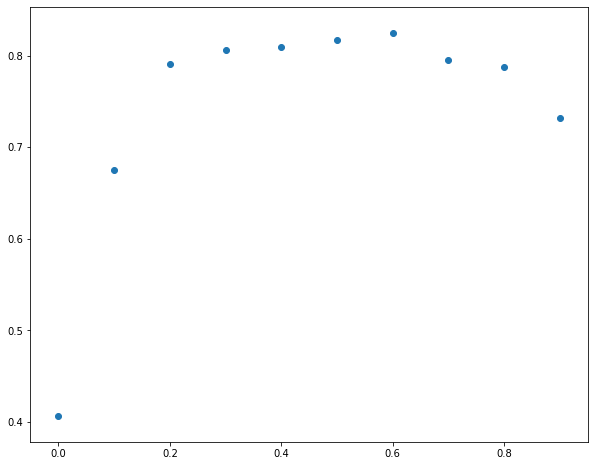

In [120]:
# 測定閾值，有較高的 accuracy
accuracies = []
thresholds = [thres for thres in np.arange(0, 1, 0.1)]
for thres in thresholds:
    accuracy = np.sum(Y_valid == (y_pred > thres))/len(Y_valid)
    accuracies.append(accuracy)

plt.scatter(thresholds, accuracies)
plt.show()

# thres = 0.4 有較高的 accuracy

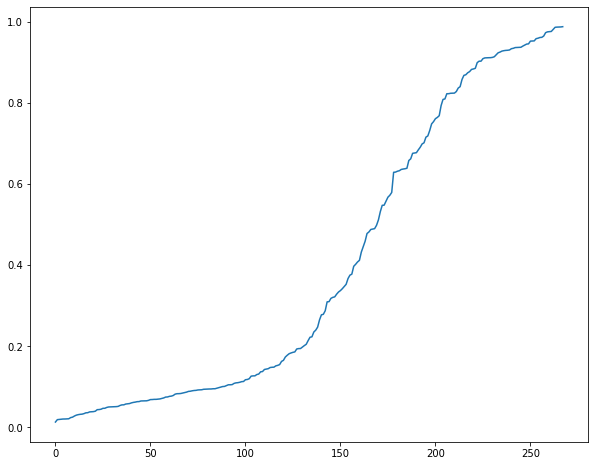

In [121]:
plt.plot(sorted(y_pred))
plt.show()

In [122]:
# Confusion Matrix
# TruePositive(TP), FalesPositive(FP, Type I error), TrueNegative(TN), FalesNegative(FN, Type II error)

# Accuracy = TP / (TP + FP + TN + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# F-score = 2 / ((1/Precision) + (1/Recall))

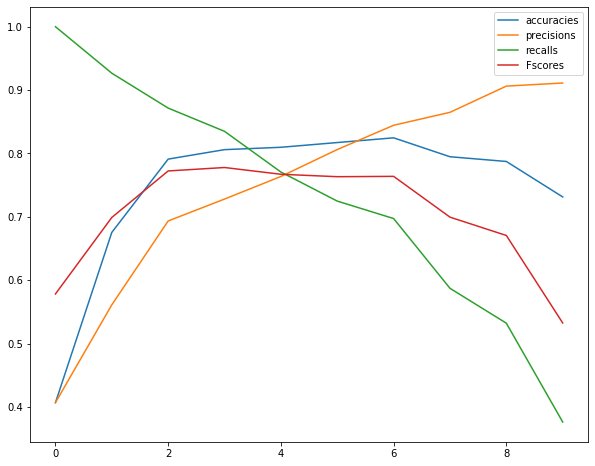

In [123]:
accuracies = []
precisions = []
recalls= []
Fscores=[]

thresholds = [thres for thres in np.arange(0, 1, 0.1)]
for thres in thresholds:
    y_pred_thres = (y_pred > thres)
    
    TP = np.sum((y_pred_thres == True)*(Y_valid == True))
    FP = np.sum((y_pred_thres == True)*(Y_valid == False)) 
    FN = np.sum((y_pred_thres == False)*(Y_valid == True))
    TN = np.sum((y_pred_thres == False)*(Y_valid == False))
    
    accuracy = np.sum(y_pred_thres==Y_valid)/len(Y_valid)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    Fscore = 2 / ((1/precision) + (1/recall))
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    Fscores.append(Fscore)

plt.plot(accuracies, label = 'accuracies')
plt.plot(precisions, label = 'precisions')
plt.plot(recalls, label = 'recalls')
plt.plot(Fscores, label = 'Fscores')

plt.legend()
plt.show()


# 空氣品質

In [124]:
# dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')
# dateparse_1 = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
# EPA_6 = pd.read_csv('air_pollution_data/EPA_OD_201806.csv', parse_dates=['PublishTime'], date_parser=dateparse)
# EPA_7 = pd.read_csv('air_pollution_data/EPA_OD_201807.csv', parse_dates=['PublishTime'], date_parser=dateparse)
# EPA_8 = pd.read_csv('air_pollution_data/EPA_OD_201808.csv', parse_dates=['PublishTime'], date_parser=dateparse)
# EPA_9 = pd.read_csv('air_pollution_data/EPA_OD_201809.csv', parse_dates=['PublishTime'], date_parser=dateparse)
# EPA_10 = pd.read_csv('air_pollution_data/EPA_OD_201810.csv', parse_dates=['PublishTime'], date_parser=dateparse)
# EPA_11 = pd.read_csv('air_pollution_data/EPA_OD_201811.csv', parse_dates=['PublishTime'], date_parser=dateparse)
# EPA_12 = pd.read_csv('air_pollution_data/EPA_OD_201812.csv', parse_dates=['PublishTime'], date_parser=dateparse_1)
# frames = [EPA_6, EPA_7, EPA_8, EPA_9, EPA_10, EPA_11, EPA_12]
# df_AQI = pd.concat(frames)
# df_AQI.to_pickle('air_pollution_data.pkl')
# df_AQI.head()

In [125]:
# df_AQI = pd.read_pickle('air_pollution_data.pkl')
# df_AQI.sort_values(by='PublishTime', inplace=True)
# df_AQI = df_AQI.loc[df_AQI['SiteName'] == '麥寮', ['SiteName', 'AQI', 'PM2.5', 'SO2', 'PublishTime']]
# df_AQI.to_pickle('df_AQI_gl.pkl')

In [126]:
df_AQI = pd.read_pickle('df_AQI_gl.pkl')

In [127]:
df_AQI.head()

,SiteName,AQI,PM2.5,SO2,PublishTime
52,麥寮,31.0,4.0,2.7,2018-06-01 00:00:00
126,麥寮,31.0,4.0,3.6,2018-06-01 01:00:00
197,麥寮,40.0,13.0,2.1,2018-06-01 02:00:00
274,麥寮,43.0,16.0,1.8,2018-06-01 03:00:00
344,麥寮,45.0,17.0,1.9,2018-06-01 04:00:00


In [128]:
len(df_AQI)

4728

In [129]:
window = 7
shift = 1 
# 設定 'PM2.5', 'SO2' 節段 (每 7 window 為 1 segment)
segments = int((df_AQI.shape[0] - window) // shift) + 1

In [130]:
# window (間隔 10 rows)
for i in range(0, len(df_AQI), 10):
    print(i,i+window)

0 7
10 17
20 27
30 37
40 47
50 57
60 67
70 77
80 87
90 97
100 107
110 117
120 127
130 137
140 147
150 157
160 167
170 177
180 187
190 197
200 207
210 217
220 227
230 237
240 247
250 257
260 267
270 277
280 287
290 297
300 307
310 317
320 327
330 337
340 347
350 357
360 367
370 377
380 387
390 397
400 407
410 417
420 427
430 437
440 447
450 457
460 467
470 477
480 487
490 497
500 507
510 517
520 527
530 537
540 547
550 557
560 567
570 577
580 587
590 597
600 607
610 617
620 627
630 637
640 647
650 657
660 667
670 677
680 687
690 697
700 707
710 717
720 727
730 737
740 747
750 757
760 767
770 777
780 787
790 797
800 807
810 817
820 827
830 837
840 847
850 857
860 867
870 877
880 887
890 897
900 907
910 917
920 927
930 937
940 947
950 957
960 967
970 977
980 987
990 997
1000 1007
1010 1017
1020 1027
1030 1037
1040 1047
1050 1057
1060 1067
1070 1077
1080 1087
1090 1097
1100 1107
1110 1117
1120 1127
1130 1137
1140 1147
1150 1157
1160 1167
1170 1177
1180 1187
1190 1197
1200 1207
1210 1217
12

In [131]:
# 0 - 7 window 為 1 segment －>  segment values (one dimension array)

for i in range(0, len(df_AQI), 10):
    seg = df_AQI.iloc[i:i+window][['SO2', 'PM2.5']]
    print(seg)
    print(seg.values.flatten())
    print('==================')

     SO2  PM2.5
52   2.7    4.0
126  3.6    4.0
197  2.1   13.0
274  1.8   16.0
344  1.9   17.0
417  2.1   19.0
487  1.9   15.0
[ 2.7  4.   3.6  4.   2.1 13.   1.8 16.   1.9 17.   2.1 19.   1.9 15. ]
      SO2  PM2.5
785   6.2   24.0
861   6.2   26.0
930   3.6   31.0
1006  2.7   33.0
1079  2.5   34.0
1154  2.3   39.0
1224  1.9   35.0
[ 6.2 24.   6.2 26.   3.6 31.   2.7 33.   2.5 34.   2.3 39.   1.9 35. ]
      SO2  PM2.5
1527  2.5   22.0
1605  2.4   17.0
1680  2.4   18.0
1758  2.3   23.0
1832  2.1   26.0
1908  1.8   22.0
1981  3.1   17.0
[ 2.5 22.   2.4 17.   2.4 18.   2.3 23.   2.1 26.   1.8 22.   3.1 17. ]
       SO2  PM2.5
2284   8.5   26.0
2363   9.1   28.0
2437  11.0   24.0
2514   8.0   22.0
2588   6.1   25.0
2666   4.8   23.0
2740   3.9   23.0
[ 8.5 26.   9.1 28.  11.  24.   8.  22.   6.1 25.   4.8 23.   3.9 23. ]
      SO2  PM2.5
3044  2.7   28.0
3122  2.2   31.0
3197  2.2   28.0
3276  2.4   21.0
3351  2.5   24.0
3430  2.5   22.0
3505  2.7   22.0
[ 2.7 28.   2.2 31.   2.2 28.   

32370  2.8   14.0
[ 1.8  9.   2.  10.   1.6  9.   1.5  5.   1.8  4.   2.9  9.   2.8 14. ]
       SO2  PM2.5
32654  2.4   11.0
32728  1.8   13.0
32761  1.7   13.0
32848  1.8   12.0
32928  1.7   10.0
33014  1.7   11.0
33049  1.8   13.0
[ 2.4 11.   1.8 13.   1.7 13.   1.8 12.   1.7 10.   1.7 11.   1.8 13. ]
       SO2  PM2.5
33358  2.1   15.0
33453  2.2   14.0
33514  2.4   13.0
33559  2.6   14.0
33620  2.7   19.0
33741  2.2   20.0
33806  3.4   13.0
[ 2.1 15.   2.2 14.   2.4 13.   2.6 14.   2.7 19.   2.2 20.   3.4 13. ]
       SO2  PM2.5
34062  3.9   15.0
34153  4.8   17.0
34237  4.4   19.0
34262  4.1   14.0
34345  2.7   13.0
34414  2.5   14.0
34538  2.3   12.0
[ 3.9 15.   4.8 17.   4.4 19.   4.1 14.   2.7 13.   2.5 14.   2.3 12. ]
       SO2  PM2.5
34805  NaN    NaN
34892  2.1    NaN
34941  2.5   12.0
35013  2.3   12.0
35053  2.5   13.0
35141  2.7   14.0
35204  3.1   13.0
[ nan  nan  2.1  nan  2.5 12.   2.3 12.   2.5 13.   2.7 14.   3.1 13. ]
       SO2  PM2.5
35505  2.5   11.0
35561  2.2

14741  1.9   14.0
[ 1.6  9.   1.5  9.   1.7  8.   2.  13.   1.8 13.   1.9  9.   1.9 14. ]
       SO2  PM2.5
15038  1.8   13.0
15113  1.9   12.0
15185  1.9   13.0
15261  1.6   16.0
15264  1.9   13.0
15338  1.6   15.0
15474  1.8   12.0
[ 1.8 13.   1.9 12.   1.9 13.   1.6 16.   1.9 13.   1.6 15.   1.8 12. ]
       SO2  PM2.5
15754  1.9   10.0
15823  1.9   10.0
15894  2.0   13.0
15897  2.7   13.0
16039  3.4   13.0
16113  4.3   13.0
16190  3.7   13.0
[ 1.9 10.   1.9 10.   2.  13.   2.7 13.   3.4 13.   4.3 13.   3.7 13. ]
       SO2  PM2.5
16462  2.3   18.0
16536  3.1   20.0
16610  2.1   16.0
16684  3.0   16.0
16755  2.8   19.0
16828  2.1   19.0
16899  2.2   19.0
[ 2.3 18.   3.1 20.   2.1 16.   3.  16.   2.8 19.   2.1 19.   2.2 19. ]
       SO2  PM2.5
17177  2.3   16.0
17244  2.2   22.0
17308  2.3   24.0
17379  3.1   29.0
17448  4.8   31.0
17517  4.6   30.0
17596  4.2   29.0
[ 2.3 16.   2.2 22.   2.3 24.   3.1 29.   4.8 31.   4.6 30.   4.2 29. ]
       SO2  PM2.5
17884  3.2   21.0
17959  2.6

[ 2.1 13.   2.  14.   2.  10.   2.   7.   1.9  8.   1.7  9.   1.8 11. ]
      SO2  PM2.5
2861  2.0   13.0
2934  2.0   14.0
3008  2.1   12.0
3083  2.2   12.0
3155  2.0    9.0
3225  1.6   11.0
3296  1.2   14.0
[ 2.  13.   2.  14.   2.1 12.   2.2 12.   2.   9.   1.6 11.   1.2 14. ]
      SO2  PM2.5
3586  1.4   10.0
3662  1.3    7.0
3736  1.2    7.0
3807  1.3   11.0
3878  1.3    7.0
3946  1.3    6.0
4018  1.3    9.0
[ 1.4 10.   1.3  7.   1.2  7.   1.3 11.   1.3  7.   1.3  6.   1.3  9. ]
      SO2  PM2.5
4318  2.6   13.0
4389  2.2   13.0
4459  2.6   13.0
4528  2.8   14.0
4599  2.1   15.0
4672  4.0   14.0
4747  3.2   17.0
[ 2.6 13.   2.2 13.   2.6 13.   2.8 14.   2.1 15.   4.  14.   3.2 17. ]
      SO2  PM2.5
5052  2.2   13.0
5126  3.1   13.0
5199  1.6   13.0
5274  1.7   13.0
5346  2.3   14.0
5418  2.5   13.0
5491  2.2   12.0
[ 2.2 13.   3.1 13.   1.6 13.   1.7 13.   2.3 14.   2.5 13.   2.2 12. ]
      SO2  PM2.5
5780  1.6   25.0
5853  1.9   18.0
5923  1.7   15.0
5992  1.6   15.0
6062  2.2  

31205  1.6   13.0
[ 1.8 12.   2.1 13.   2.  14.   1.8 18.   1.8 17.   2.1 13.   1.6 13. ]
       SO2  PM2.5
31506  1.9   12.0
31573  1.7   13.0
31602  1.5   15.0
31708  1.4   16.0
31769  1.9   15.0
31844  1.9   12.0
31907  2.1   13.0
[ 1.9 12.   1.7 13.   1.5 15.   1.4 16.   1.9 15.   1.9 12.   2.1 13. ]
       SO2  PM2.5
32166  1.7   14.0
32227  2.0   13.0
32283  1.0   15.0
32332  2.0   15.0
32350  1.9   16.0
32460  2.0   17.0
32518  2.2   17.0
[ 1.7 14.   2.  13.   1.  15.   2.  15.   1.9 16.   2.  17.   2.2 17. ]
       SO2  PM2.5
32722  3.3   18.0
32823  3.5   19.0
32893  5.0   29.0
32947  3.9   32.0
33029  3.5   22.0
33075  2.4   11.0
33167  2.4   17.0
[ 3.3 18.   3.5 19.   5.  29.   3.9 32.   3.5 22.   2.4 11.   2.4 17. ]
       SO2  PM2.5
33426  1.9   11.0
33498  1.9    5.0
33557  1.9    3.0
33682  2.4    3.0
33736  2.3    6.0
33778  3.8    5.0
33793  1.8    4.0
[ 1.9 11.   1.9  5.   1.9  3.   2.4  3.   2.3  6.   3.8  5.   1.8  4. ]
       SO2  PM2.5
34025  2.8    4.0
34103  1.9

11278  3.5   31.0
[ 2.4 20.   2.5 19.   3.  19.   2.7 18.   3.6 18.   3.6 20.   3.5 31. ]
       SO2  PM2.5
11603  3.2   22.0
11680  3.2   21.0
11690  3.6   13.0
11774  2.7   13.0
11862  2.2   16.0
11981  2.6   14.0
12057  3.6   18.0
[ 3.2 22.   3.2 21.   3.6 13.   2.7 13.   2.2 16.   2.6 14.   3.6 18. ]
       SO2  PM2.5
12311  1.5   10.0
12392  1.6    8.0
12470  1.4    6.0
12542  1.5    9.0
12613  1.8   10.0
12686  1.9   13.0
12758  1.8   13.0
[ 1.5 10.   1.6  8.   1.4  6.   1.5  9.   1.8 10.   1.9 13.   1.8 13. ]
       SO2  PM2.5
13039  2.5   18.0
13123  2.6   16.0
13206  3.9   19.0
13284  1.9   19.0
13363  2.5   16.0
13439  2.4   15.0
13515  1.8   14.0
[ 2.5 18.   2.6 16.   3.9 19.   1.9 19.   2.5 16.   2.4 15.   1.8 14. ]
       SO2  PM2.5
13803  2.6   16.0
13876  2.7   19.0
13949  9.7   19.0
14022  4.4   20.0
14091  3.3   22.0
14160  5.1   19.0
14228  2.4   16.0
[ 2.6 16.   2.7 19.   9.7 19.   4.4 20.   3.3 22.   5.1 19.   2.4 16. ]
       SO2  PM2.5
14491  4.9   13.0
14558  6.0

       SO2  PM2.5
45242  1.5   23.0
45318  1.6   24.0
45331  3.7   24.0
45421  2.4   22.0
45509  1.9   22.0
45596  3.0   24.0
45682  5.2   22.0
[ 1.5 23.   1.6 24.   3.7 24.   2.4 22.   1.9 22.   3.  24.   5.2 22. ]
       SO2  PM2.5
46001  4.5   24.0
46076  4.3   25.0
46152  4.0   27.0
46229  4.3   28.0
46305  3.4   27.0
46382  3.2   27.0
46459  3.5   24.0
[ 4.5 24.   4.3 25.   4.  27.   4.3 28.   3.4 27.   3.2 27.   3.5 24. ]
       SO2  PM2.5
46763  1.9   26.0
46839  1.7   28.0
46915  1.8   32.0
46990  1.7   28.0
47065  1.7   20.0
47141  3.7   21.0
47219  6.2   23.0
[ 1.9 26.   1.7 28.   1.8 32.   1.7 28.   1.7 20.   3.7 21.   6.2 23. ]
       SO2  PM2.5
47455  3.6   16.0
47524  3.4   17.0
47598  3.0   17.0
47674  3.0   15.0
47750  2.5   13.0
47827  3.3   14.0
47906  4.5   15.0
[ 3.6 16.   3.4 17.   3.  17.   3.  15.   2.5 13.   3.3 14.   4.5 15. ]
       SO2  PM2.5
48160  2.0   18.0
48298  1.9   21.0
48369  1.9   22.0
48443  1.7   16.0
48518  1.7   16.0
48592  1.8   21.0
48667  1.7

20914  4.8   19.0
[ 4.3 13.   2.2 12.   2.4 11.   2.8 16.   7.5 22.   5.2 24.   4.8 19. ]
       SO2  PM2.5
21221  6.1   20.0
21229  5.6   18.0
21306  8.0   20.0
21393  7.7   19.0
21476  2.1   18.0
21594  1.6   16.0
21666  1.6   12.0
[ 6.1 20.   5.6 18.   8.  20.   7.7 19.   2.1 18.   1.6 16.   1.6 12. ]
       SO2  PM2.5
21957  1.7   14.0
21976  2.7   15.0
22099  3.0   19.0
22169  3.5   20.0
22240  4.2   21.0
22314  4.7   22.0
22390  5.0   22.0
[ 1.7 14.   2.7 15.   3.  19.   3.5 20.   4.2 21.   4.7 22.   5.  22. ]
       SO2  PM2.5
22679  NaN    NaN
22752  NaN    NaN
22826  NaN    NaN
22899  NaN    NaN
22972  NaN    8.0
23046  2.2   14.0
23120  2.3   15.0
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  8.   2.2 14.   2.3 15. ]
       SO2  PM2.5
23354  2.4   11.0
23432  2.2   14.0
23571  2.1   18.0
23642  1.8   13.0
23716  1.5    9.0
23788  1.5   16.0
23859  2.0   22.0
[ 2.4 11.   2.2 14.   2.1 18.   1.8 13.   1.5  9.   1.5 16.   2.  22. ]
        SO2  PM2.5
24159   3.6   37.0
24234   

       SO2  PM2.5
53724  NaN    NaN
53818  1.6   35.0
53838  2.1   39.0
53918  1.8   38.0
54020  1.8   31.0
54057  1.8   29.0
54155  1.8   26.0
[ nan  nan  1.6 35.   2.1 39.   1.8 38.   1.8 31.   1.8 29.   1.8 26. ]
       SO2  PM2.5
54509  2.8   29.0
54583  1.6   27.0
54661  1.6   23.0
54738  2.1   23.0
54813  2.4   29.0
54887  2.5   31.0
54963  2.8   29.0
[ 2.8 29.   1.6 27.   1.6 23.   2.1 23.   2.4 29.   2.5 31.   2.8 29. ]
       SO2  PM2.5
55260  3.2   22.0
55343  2.6   23.0
55417  2.4   28.0
55430  2.6   27.0
55562  2.4   18.0
55633  3.5   18.0
55689  5.3   21.0
[ 3.2 22.   2.6 23.   2.4 28.   2.6 27.   2.4 18.   3.5 18.   5.3 21. ]
       SO2  PM2.5
56017  2.3   21.0
56086  1.5   21.0
56168  1.8   19.0
70     3.5   18.0
120    3.3   15.0
172    3.9   17.0
223    4.1   17.0
[ 2.3 21.   1.5 21.   1.8 19.   3.5 18.   3.3 15.   3.9 17.   4.1 17. ]
      SO2  PM2.5
562   1.8   14.0
649   1.7   15.0
736   1.7   15.0
756   2.8   22.0
833   2.2   27.0
975   1.9   23.0
1051  2.1   24.0


31899  2.3   38.0
[ 1.8 26.   2.1 32.   3.4 39.   2.6 40.   2.3 44.   2.2 45.   2.3 38. ]
       SO2  PM2.5
32142  2.1   19.0
32240  1.9   10.0
32303  2.8    9.0
32364  4.3   12.0
32428  4.9   14.0
32494  3.8   13.0
32568  4.1   16.0
[ 2.1 19.   1.9 10.   2.8  9.   4.3 12.   4.9 14.   3.8 13.   4.1 16. ]
       SO2  PM2.5
32838  1.6   13.0
32899  1.6   11.0
32980  1.9    9.0
33035  1.5    6.0
33144  1.7   10.0
33223  2.1   13.0
33299  2.4   12.0
[ 1.6 13.   1.6 11.   1.9  9.   1.5  6.   1.7 10.   2.1 13.   2.4 12. ]
       SO2  PM2.5
33582  3.6   15.0
33653  2.9   14.0
33730  2.5   14.0
33791  2.7   15.0
33846  1.9   17.0
33948  2.7   18.0
34022  3.3   15.0
[ 3.6 15.   2.9 14.   2.5 14.   2.7 15.   1.9 17.   2.7 18.   3.3 15. ]
       SO2  PM2.5
34255  3.1   27.0
34399  5.6    NaN
34475  7.4   23.0
34551  2.1   24.0
34624  2.4   23.0
34704  2.2   19.0
34783  1.8   17.0
[ 3.1 27.   5.6  nan  7.4 23.   2.1 24.   2.4 23.   2.2 19.   1.8 17. ]
       SO2  PM2.5
35086  1.9   22.0
35162  1.6

21349  3.6   24.0
[ 5.9 31.   4.8 29.   4.3 29.   7.1 33.   4.9 28.   5.2 23.   3.6 24. ]
       SO2  PM2.5
21647  6.3   19.0
21721  2.7   18.0
21796  2.5   15.0
21870  2.4   12.0
21946  2.5   15.0
22022  2.6   15.0
22033  2.3   11.0
[ 6.3 19.   2.7 18.   2.5 15.   2.4 12.   2.5 15.   2.6 15.   2.3 11. ]
       SO2  PM2.5
22366  2.6   12.0
22446  2.0   13.0
22523  1.9   13.0
22603  2.0   11.0
22619  2.5   13.0
22699  3.2   15.0
22833  2.5   15.0
[ 2.6 12.   2.  13.   1.9 13.   2.  11.   2.5 13.   3.2 15.   2.5 15. ]
       SO2  PM2.5
23120  4.2   18.0
23190  4.3   11.0
23261  2.5   10.0
23331  2.2   14.0
23401  2.1   17.0
23474  2.3   15.0
23546  2.0   12.0
[ 4.2 18.   4.3 11.   2.5 10.   2.2 14.   2.1 17.   2.3 15.   2.  12. ]
       SO2  PM2.5
23841  2.1    7.0
23915  2.0    8.0
23992  2.0    9.0
24001  2.0   10.0
24140  2.0    9.0
24210  2.2    6.0
24281  1.6    8.0
[ 2.1  7.   2.   8.   2.   9.   2.  10.   2.   9.   2.2  6.   1.6  8. ]
       SO2  PM2.5
24569  1.5    9.0
24641  1.6

50013  3.1   19.0
[ 7.4 22.   7.7 19.   7.  15.   5.5  9.   5.5 13.   5.2 21.   3.1 19. ]
       SO2  PM2.5
50339  1.6    6.0
50432  1.7    4.0
50506  1.7    7.0
50578  1.5    7.0
50647  1.6    5.0
50718  1.4   10.0
50789  1.5    9.0
[ 1.6  6.   1.7  4.   1.7  7.   1.5  7.   1.6  5.   1.4 10.   1.5  9. ]
       SO2  PM2.5
51052  2.2    9.0
51115  2.6    5.0
51176  2.4    3.0
51242  1.9    7.0
51313  1.3    5.0
51377  1.6    2.0
51445  1.6    6.0
[2.2 9.  2.6 5.  2.4 3.  1.9 7.  1.3 5.  1.6 2.  1.6 6. ]
       SO2  PM2.5
51711  1.5    7.0
51776  1.5    8.0
51846  1.5    7.0
51916  1.6    7.0
51988  1.4   10.0
52060  1.4   10.0
52073  1.9    9.0
[ 1.5  7.   1.5  8.   1.5  7.   1.6  7.   1.4 10.   1.4 10.   1.9  9. ]


In [132]:
X=[]
Y=[]
for segment in range(0, len(df_AQI), 10):
    seg = df_AQI.iloc[segment:segment+window][['SO2', 'PM2.5']]
    X.append(seg.values)
    Y.append(df_AQI.iloc[segment+window]['AQI'])
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

# 473 segment(4721 每 10 筆)
# 7 window
# 2 columns

((473, 7, 2), (473,))

In [133]:
train = np.zeros((segments-1, 2 * window)) # (4721, 14)
target = np.zeros((segments-1,)) # (4721,)

# 每 segment 
for segment in range(segments -1):
    seg = df_AQI.iloc[segment:segment+window][['SO2', 'PM2.5']] 
    # (7, 2)...
    
    target[segment] = df_AQI.iloc[segment+window][['AQI']]
    train[segment] = np.append(seg['SO2'].values, seg['PM2.5'].values)
    # 合併 'SO2', 'PM2.5' 為 1-D array
    # (14, )...

In [134]:
train = np.where(np.isnan(train), -1, train)
target = np.where(np.isnan(target), int(np.nanmean(target)), target)

In [135]:
train.shape, target.shape

((4721, 14), (4721,))

In [136]:
X_train, X_valid, Y_train, Y_valid = train_test_split(train, target, test_size=0.2, random_state=2019)
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((3776, 14), (3776,), (945, 14), (945,))

In [137]:
# Set our parameters for xgboost
params = {}

# 請填入以下參數: 
# 目標函數: 線性回歸
# 評價函數: rmse
# 學習速度: 0.01
# 最大深度: 5
# bst = xgboost.train(params, d_train, 3000, watchlist, early_stopping_rounds=50, verbose_eval=10)
#=============your works starts===============#
params['objective'] = 'reg:linear'
params['eval_metric'] = 'rmse'
params['eta'] = 0.01
params['max_depth'] = 5
d_train = xgboost.DMatrix(X_train, label=Y_train)
d_valid = xgboost.DMatrix(X_valid, label=Y_valid)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
bst = xgboost.train(params, d_train, 3000, watchlist, early_stopping_rounds=10, verbose_eval=10)
Y_pred = bst.predict(xgboost.DMatrix(X_valid))
#==============your works ends================#


[18:16:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:76.1747	valid-rmse:76.5219
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[10]	train-rmse:69.2443	valid-rmse:69.7998
[20]	train-rmse:62.993	valid-rmse:63.7725
[30]	train-rmse:57.3551	valid-rmse:58.3676
[40]	train-rmse:52.2739	valid-rmse:53.537
[50]	train-rmse:47.699	valid-rmse:49.2143
[60]	train-rmse:43.5828	valid-rmse:45.3689
[70]	train-rmse:39.8811	valid-rmse:41.9632
[80]	train-rmse:36.556	valid-rmse:38.9155
[90]	train-rmse:33.5719	valid-rmse:36.2215
[100]	train-rmse:30.8995	valid-rmse:33.8339
[110]	train-rmse:28.511	valid-rmse:31.7292
[120]	train-rmse:26.3782	valid-rmse:29.8953
[130]	train-rmse:24.4759	valid-rmse:28.3082
[140]	train-rmse:22.7833	valid-rmse:26.9174
[150]	train-rmse:21.2851	valid-rmse:25.7097
[16

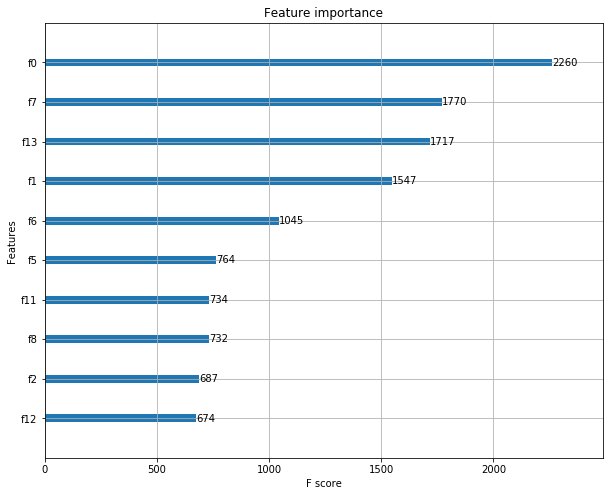

In [138]:
# 請使用 xgboost.plot_importance，並設定max_num_features=10
#!=============your works starts===============!#
xgboost.plot_importance(bst, max_num_features=10)
#!==============your works ends================!#

plt.show()

In [139]:
Y_pred, Y_valid

(array([ 95.3592  ,  47.568813,  36.096188,  61.097866, 113.89423 ,
         66.25145 ,  64.47418 ,  37.112396, 118.265816,  59.019196,
         58.007217,  74.12227 ,  55.714855,  52.870743,  95.36158 ,
         49.509346,  53.564312,  78.00675 ,  77.54937 ,  70.797676,
        164.34262 ,  74.13765 ,  42.907013,  51.785557, 135.16904 ,
         52.62581 ,  68.22501 ,  31.354467,  45.366528,  51.593906,
         94.6649  ,  87.6527  ,  68.70165 , 126.600204,  69.6861  ,
         88.44517 ,  49.165035,  61.830845,  84.16817 , 134.99524 ,
         71.31327 , 136.65605 ,  93.02862 ,  63.21216 , 109.98297 ,
         76.846214,  45.744564,  53.45645 ,  99.84014 ,  44.275764,
         43.87326 ,  60.944386,  66.31805 ,  69.44382 ,  46.75211 ,
         78.100136,  50.030624,  62.39572 ,  70.97649 ,  45.325   ,
        109.27161 ,  54.41652 ,  71.44351 ,  70.35354 ,  65.62148 ,
         95.96097 ,  61.580723,  45.618866,  35.315475,  56.310974,
         43.675705,  80.729805,  68.63962 ,  62.

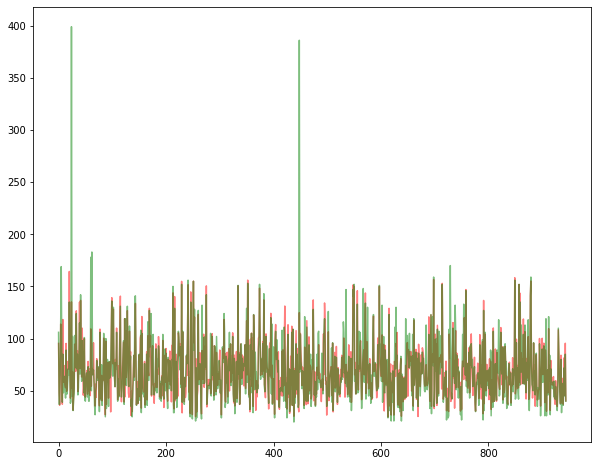

In [140]:
plt.plot(Y_pred, label='Y_pred', alpha=0.5, c='r')
plt.plot(Y_valid, label='Y_valid', alpha=0.5, c='g')
plt.show()

In [141]:
# X_valid －> Y_pred (添加'predict'欄位)

df_result = pd.DataFrame()

Y_pred = bst.predict(xgboost.DMatrix(X_valid))

df_result['predict'] = Y_pred
df_result.head()

,predict
0,95.359200
1,47.568813
2,36.096188
3,61.097866
4,113.894234


In [142]:
df_result = pd.DataFrame()

# 1. 使用X_valid去評價此模型
# 2. 使用 ['predict', 'truth', 'error'] 三個欄位的DataFrame去使決畫呈現預測結果
#    (1). 請注意與測結果(Y_pred)與真實值(Y_valid)都必須取exp方能反映實際情況
#    (2). error 請使用計算np.abs(predict-truth)/truth計算誤差百分比
# 3. 使用truth欄位排序dataframe rows
#=============your works starts===============#
Y_pred = Y_pred = bst.predict(xgboost.DMatrix(X_valid))

df_result['predict'] = Y_pred
df_result['truth'] = Y_valid
df_result['error'] = np.abs(Y_pred - Y_valid)/Y_valid

df_result_sort = df_result.sort_values('truth')
#==============your works ends================#

df_result_sort.head()

,predict,truth,error
438,25.566956,20.0,0.278348
619,26.698137,21.0,0.271340
255,25.146914,21.0,0.197472
624,26.671955,21.0,0.270093
638,25.598660,21.0,0.218984


C:\Users\user\IIIMaterial\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  


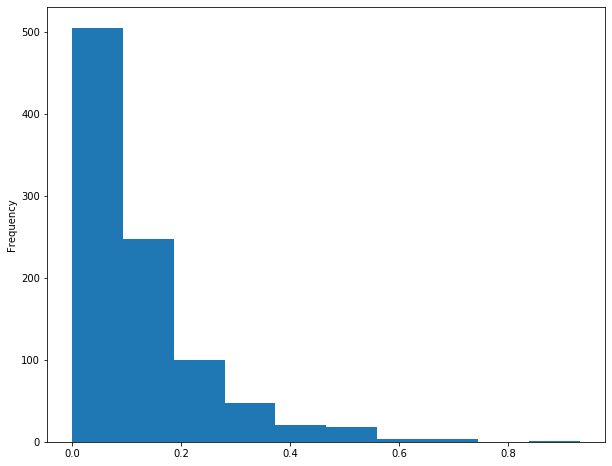

In [143]:
# error 分布圖
df_result_sort['error'].plot('hist')

C:\Users\user\IIIMaterial\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


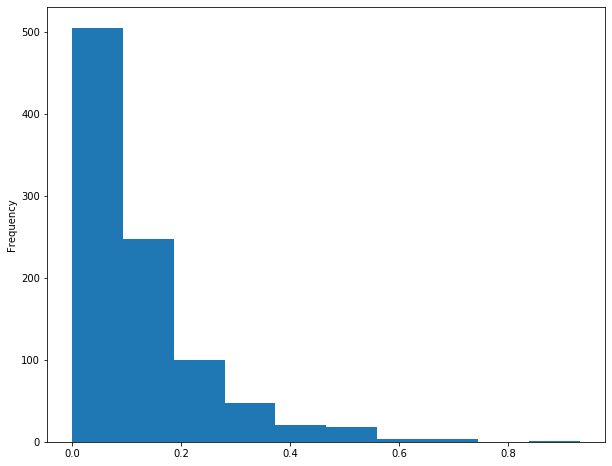

In [144]:
# 請使用df_result_sort濾掉error大於1的部分畫出error的分布圖
#!=============your works starts===============!#
df_result_sort.loc[df_result_sort['error'] < 1, 'error'].plot('hist')
#!==============your works ends================!#

plt.show()

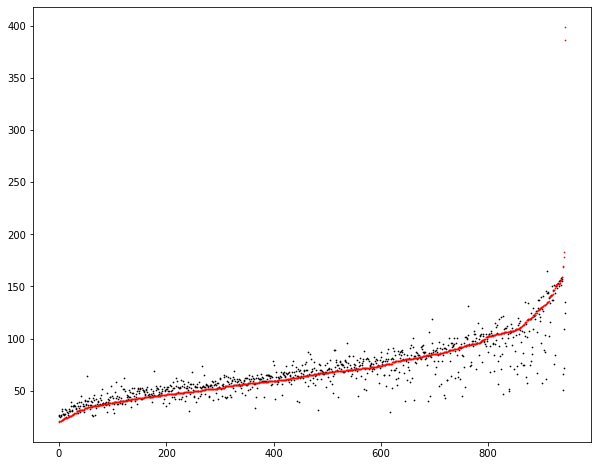

In [145]:
# 請使用plt.scatter，以0~len(df_result)作為x，預測值(黑色)與實際值(紅色)作為y。
#!=============your works starts===============!#
plt.scatter(range(0, len(df_result)), df_result_sort['predict'], c='black', s=0.5)
plt.scatter(range(0, len(df_result)), df_result_sort['truth'], c='red', s=0.5)
#!==============your works ends================!#

plt.show()

# 水稻田(影像辨識)

In [146]:
import os
import tarfile
import shutil
import pandas as pd
import numpy as np
import pylab as plt
import cv2
img_dir = os.path.join('farm_data', 'lands_pieces_tif_practice')


In [147]:
class Normalizer():
    def fit(self, X, min_val=None, max_val=None):
        self.min = np.nanmin(X) if min_val == None else min_val
        self.max = np.nanmax(X) if max_val == None else max_val
        
    def transform(self, X):
        return (X - self.min) / (self.max - self.min)

    def fit_transform(self, X, min_val=None, max_val=None):
        self.fit(X, min_val, max_val)
        return self.transform(X)
        
    def reverse_transform(self, Y):
        return (Y * (self.max - self.min)) + self.min


In [148]:
if not os.path.isdir(img_dir):
    tar = tarfile.open(os.path.join('farm_data',  'lands_pieces_tif_practice.tar.gz'))
    names = tar.getnames()
    for name in names:
        tar.extract(name,path=os.path.join('farm_data'))
    tar.close()

In [149]:
os.listdir(os.path.join('farm_data','lands_pieces_tif_practice'))

# numpy 格式檔
# len(): 2685

['00049.npy',
 '00054.npy',
 '00076.npy',
 '00085.npy',
 '00093.npy',
 '00418.npy',
 '00420.npy',
 '00433.npy',
 '00434.npy',
 '00437.npy',
 '00440.npy',
 '00442.npy',
 '00444.npy',
 '00448.npy',
 '00456.npy',
 '00457.npy',
 '00460.npy',
 '00468.npy',
 '00470.npy',
 '00471.npy',
 '00474.npy',
 '00477.npy',
 '00478.npy',
 '00483.npy',
 '00484.npy',
 '00491.npy',
 '00493.npy',
 '00495.npy',
 '00497.npy',
 '00498.npy',
 '00502.npy',
 '00504.npy',
 '00510.npy',
 '00512.npy',
 '00513.npy',
 '00537.npy',
 '00544.npy',
 '00547.npy',
 '00549.npy',
 '00551.npy',
 '00554.npy',
 '00556.npy',
 '00558.npy',
 '00559.npy',
 '00561.npy',
 '01017.npy',
 '01256.npy',
 '01258.npy',
 '01259.npy',
 '01260.npy',
 '01265.npy',
 '01266.npy',
 '01284.npy',
 '01285.npy',
 '01290.npy',
 '01308.npy',
 '01351.npy',
 '02247.npy',
 '02446.npy',
 '04586.npy',
 '04593.npy',
 '04597.npy',
 '04611.npy',
 '04616.npy',
 '04617.npy',
 '04623.npy',
 '04639.npy',
 '04640.npy',
 '04641.npy',
 '04642.npy',
 '04643.npy',
 '0465

In [150]:
# '00554.npy' numpy array 的 shape

fp = os.path.join('farm_data','lands_pieces_tif_practice', '00554.npy')
with open(fp, 'rb') as f:
    X=np.load(f)
X.shape

(114, 149, 17)

In [151]:
# numpy array －> image

# fps = [os.path.join(img_dir, fn) for fn in os.listdir(img_dir)]
# i=0
# for fp in fps[:10]:
#     X = get_nparray(fp)
#     X = X[:, :, [i+3, i+2, i+1]]
#     X[X==0] = 1
#     X = np.log(X)
#     plt.imshow(X)
#     plt.imshow(Normalizer().fit_transform(X, min_val=0, max_val=9.913))
#     plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


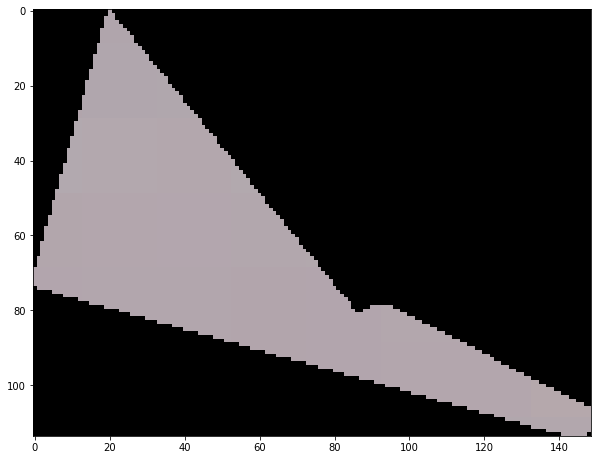

In [152]:
# '00554.npy' image

i = 0
fp = os.path.join('farm_data','lands_pieces_tif_practice', '00554.npy')
with open (fp, 'rb') as f:
    X = np.load(f)
    X = X[:, :, [i+3, i+2, i+1]]
    X[X==0] = 1
    X = np.log(X)
    plt.imshow(X)
    plt.imshow(Normalizer().fit_transform(X, min_val=0, max_val=9.913))
    plt.show()

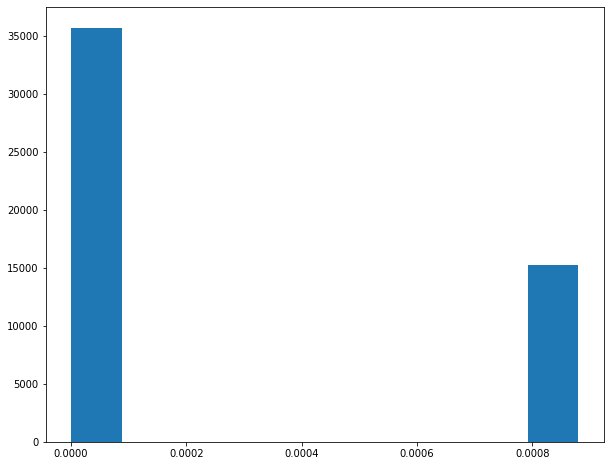

In [153]:
i = 0
fp = os.path.join('farm_data','lands_pieces_tif_practice','00554.npy')
with open (fp, 'rb') as f:
    X = np.load(f)
    X = X[:, :, [i+3, i+2, i+1]]
    X[X==0] = 1
    X = np.log(X)
    X = Normalizer().fit_transform(X, min_val=0, max_val=8000)
    plt.hist(X.flatten())
    plt.show()

In [154]:
fns = os.listdir(os.path.join('farm_data','lands_pieces_tif_practice'))
print(fns)

['00049.npy', '00054.npy', '00076.npy', '00085.npy', '00093.npy', '00418.npy', '00420.npy', '00433.npy', '00434.npy', '00437.npy', '00440.npy', '00442.npy', '00444.npy', '00448.npy', '00456.npy', '00457.npy', '00460.npy', '00468.npy', '00470.npy', '00471.npy', '00474.npy', '00477.npy', '00478.npy', '00483.npy', '00484.npy', '00491.npy', '00493.npy', '00495.npy', '00497.npy', '00498.npy', '00502.npy', '00504.npy', '00510.npy', '00512.npy', '00513.npy', '00537.npy', '00544.npy', '00547.npy', '00549.npy', '00551.npy', '00554.npy', '00556.npy', '00558.npy', '00559.npy', '00561.npy', '01017.npy', '01256.npy', '01258.npy', '01259.npy', '01260.npy', '01265.npy', '01266.npy', '01284.npy', '01285.npy', '01290.npy', '01308.npy', '01351.npy', '02247.npy', '02446.npy', '04586.npy', '04593.npy', '04597.npy', '04611.npy', '04616.npy', '04617.npy', '04623.npy', '04639.npy', '04640.npy', '04641.npy', '04642.npy', '04643.npy', '04650.npy', '04651.npy', '04656.npy', '04658.npy', '04664.npy', '04668.npy'

In [155]:
fps = [os.path.join('farm_data','lands_pieces_tif_practice', fn) for fn in fns]
print(fps)

['farm_data\\lands_pieces_tif_practice\\00049.npy', 'farm_data\\lands_pieces_tif_practice\\00054.npy', 'farm_data\\lands_pieces_tif_practice\\00076.npy', 'farm_data\\lands_pieces_tif_practice\\00085.npy', 'farm_data\\lands_pieces_tif_practice\\00093.npy', 'farm_data\\lands_pieces_tif_practice\\00418.npy', 'farm_data\\lands_pieces_tif_practice\\00420.npy', 'farm_data\\lands_pieces_tif_practice\\00433.npy', 'farm_data\\lands_pieces_tif_practice\\00434.npy', 'farm_data\\lands_pieces_tif_practice\\00437.npy', 'farm_data\\lands_pieces_tif_practice\\00440.npy', 'farm_data\\lands_pieces_tif_practice\\00442.npy', 'farm_data\\lands_pieces_tif_practice\\00444.npy', 'farm_data\\lands_pieces_tif_practice\\00448.npy', 'farm_data\\lands_pieces_tif_practice\\00456.npy', 'farm_data\\lands_pieces_tif_practice\\00457.npy', 'farm_data\\lands_pieces_tif_practice\\00460.npy', 'farm_data\\lands_pieces_tif_practice\\00468.npy', 'farm_data\\lands_pieces_tif_practice\\00470.npy', 'farm_data\\lands_pieces_tif_p

In [156]:
def get_nparray(fp):
    # use np.load to load npy data
    with open(fp, 'rb') as f:
        #=============your works starts===============#
        X = np.load(f)
        #==============your works ends================#
    return X

In [157]:
def show_img(X):
    X = X[:, :, 3]
    X[X==0] = 1
    X = np.log(X)
    X = Normalizer().fit_transform(X, min_val=0, max_val=9.913)
    plt.imshow(X)
    plt.show()

0 (111, 63, 17)


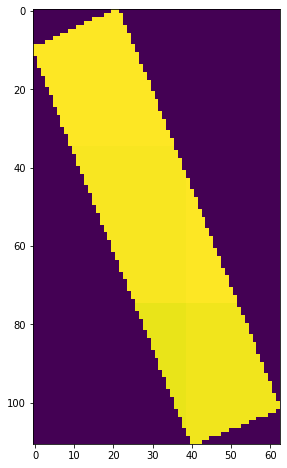

1 (195, 120, 17)


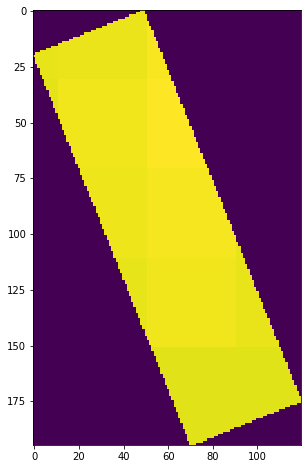

2 (73, 114, 17)


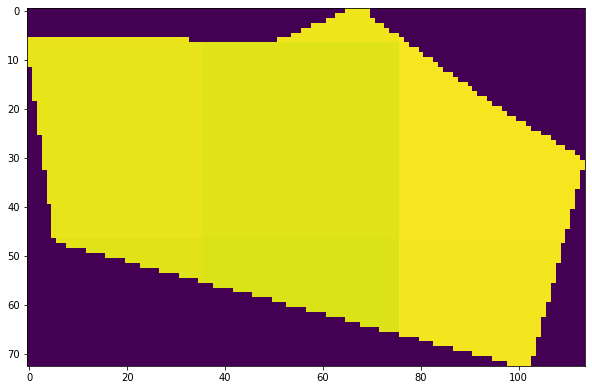

3 (89, 72, 17)


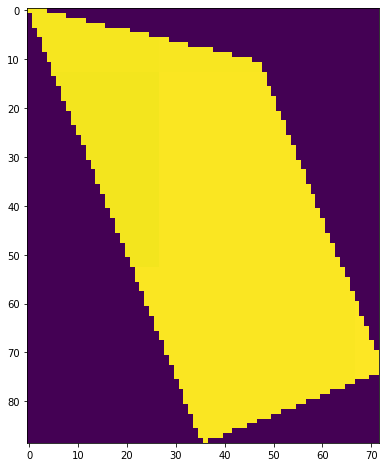

4 (141, 70, 17)


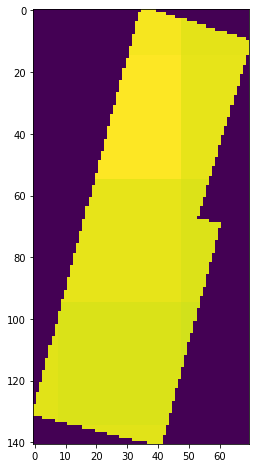

5 (93, 51, 17)


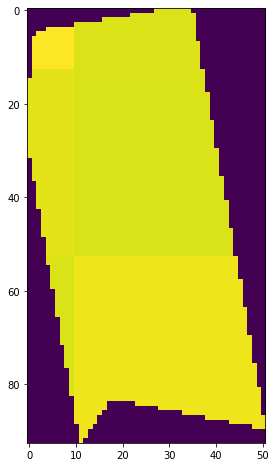

6 (118, 65, 17)


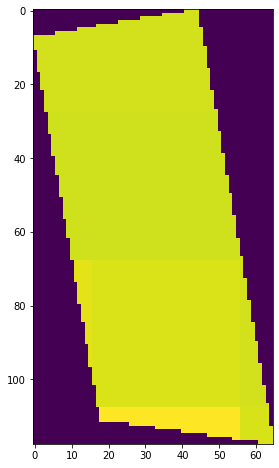

7 (117, 49, 17)


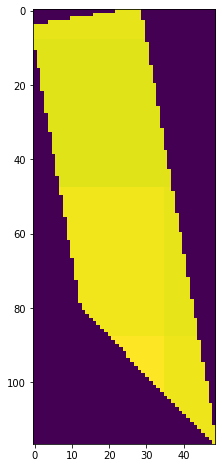

8 (56, 40, 17)


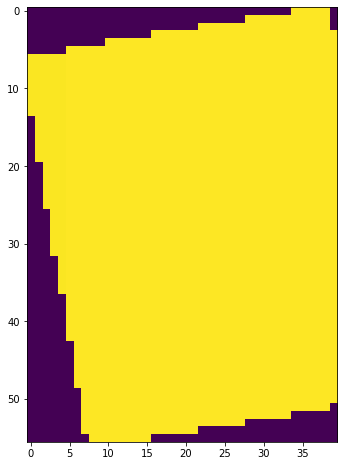

9 (167, 90, 17)


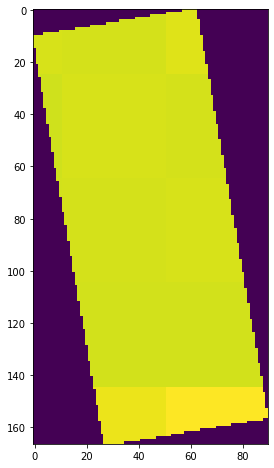

In [158]:
fns = os.listdir(os.path.join('farm_data','lands_pieces_tif_practice'))
fps = [os.path.join('farm_data','lands_pieces_tif_practice', fn) for fn in fns]
for i in range(10):
    X = get_nparray(fps[i])
    print(i, X.shape)
    show_img(X)

In [159]:
# image size 不一致
# 轉成 統一格式

In [160]:
fps = [os.path.join('farm_data','lands_pieces_tif_practice', fn) for fn in fns]
shapes = []
for fp in fps:
    X = get_nparray(fp)
    shapes.append(X.shape)
shapes = np.array(shapes)
shapes.shape

# (image量, 3-Dimension)

(2685, 3)

In [161]:
from collections import Counter
Counter(shapes[:,2])

# 每個 image 皆為 (__, __, 17)

Counter({17: 2685})

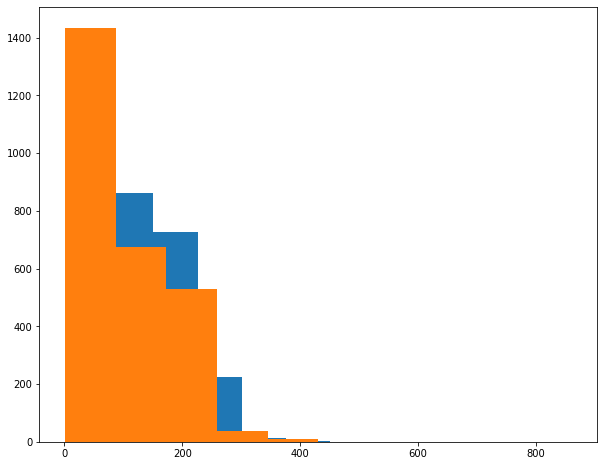

In [162]:
fps = [os.path.join('farm_data','lands_pieces_tif_practice', fn) for fn in fns]
shapes = []
for fp in fps:
    X = get_nparray(fp)
    shapes.append(X.shape)
shapes = np.array(shapes)
plt.hist(shapes[:,0])
plt.hist(shapes[:,1])
plt.show()

# X.shape分布大多: ((300以下), (300以下), 17)

(118, 48, 17)


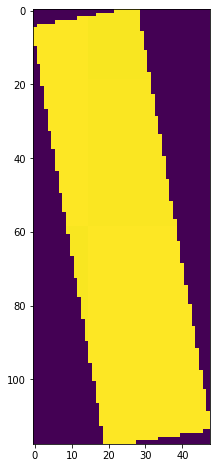

In [163]:
# 統一為 (300, 300, 17)
# 範例 (第 10)

fns = os.listdir(os.path.join('farm_data','lands_pieces_tif_practice'))
fps = [os.path.join('farm_data','lands_pieces_tif_practice', fn) for fn in fns]
fn = fps[10]
X = get_nparray(fn)
print(X.shape)
show_img(X)

In [164]:
# (118, 48, 17) －> 目標：(300, 300, 17)
# np.pad(array, pad_with)
print(X.shape)
X_padded = np.pad(X,((0, 300-118) ,(0, 300-48) ,(0, 0)))
print(X_padded.shape)

(118, 48, 17)
(300, 300, 17)


In [165]:
def pad_img_to_300(X, pad_to_n_cols=300, pad_to_n_rows=300):
    rows, cols = X.shape[:2]
    padded_cols = pad_to_n_cols - cols if cols < pad_to_n_cols else 0
    padded_rows = pad_to_n_rows - rows if rows < pad_to_n_rows else 0
    # use np.pad with param('constant', constant_values=0) to pad_to_n_cols, pad_to_n_rows
    #=============your works starts===============#
    X = np.pad(X, ((0, padded_rows), (0, padded_cols), (0,0)), 'constant', constant_values=0)[:pad_to_n_rows, :pad_to_n_cols]
    
    X = X[:300,:300,:]
    #==============your works ends================#
    return X

In [166]:
# 測試 pad_img_to_300() 確定轉成 (300, 300, 17)
X = get_nparray(fn)
pad_img_to_300(X).shape

(300, 300, 17)

In [167]:
# 1. get all fps for  os.listdir(img_dir)
# 2. get all data from get_nparray
# 3. pad_img_to_300
# 4. use cv2 to resize  to (50, 50 ,-1) and flatten it
# 5. flatten X
#=============your works starts===============#
fps = [os.path.join('farm_data','lands_pieces_tif_practice', fn) for fn in fns]
X = [get_nparray(fp) for fp in fps]
X = [pad_img_to_300(x)for x in X]

# 改變解析度：壓縮成 50*50
X = np.array([cv2.resize(x, (50,50)).flatten() for x in X])
#==============your works ends================#

X.shape
# (image量, 50*50*17)

(2685, 42500)

In [168]:
fns

['00049.npy',
 '00054.npy',
 '00076.npy',
 '00085.npy',
 '00093.npy',
 '00418.npy',
 '00420.npy',
 '00433.npy',
 '00434.npy',
 '00437.npy',
 '00440.npy',
 '00442.npy',
 '00444.npy',
 '00448.npy',
 '00456.npy',
 '00457.npy',
 '00460.npy',
 '00468.npy',
 '00470.npy',
 '00471.npy',
 '00474.npy',
 '00477.npy',
 '00478.npy',
 '00483.npy',
 '00484.npy',
 '00491.npy',
 '00493.npy',
 '00495.npy',
 '00497.npy',
 '00498.npy',
 '00502.npy',
 '00504.npy',
 '00510.npy',
 '00512.npy',
 '00513.npy',
 '00537.npy',
 '00544.npy',
 '00547.npy',
 '00549.npy',
 '00551.npy',
 '00554.npy',
 '00556.npy',
 '00558.npy',
 '00559.npy',
 '00561.npy',
 '01017.npy',
 '01256.npy',
 '01258.npy',
 '01259.npy',
 '01260.npy',
 '01265.npy',
 '01266.npy',
 '01284.npy',
 '01285.npy',
 '01290.npy',
 '01308.npy',
 '01351.npy',
 '02247.npy',
 '02446.npy',
 '04586.npy',
 '04593.npy',
 '04597.npy',
 '04611.npy',
 '04616.npy',
 '04617.npy',
 '04623.npy',
 '04639.npy',
 '04640.npy',
 '04641.npy',
 '04642.npy',
 '04643.npy',
 '0465

In [169]:
# df_lands.csv
df_lands = pd.read_csv(os.path.join('farm_data', 'df_lands.csv'))
df_lands

,Unnamed: 0,idx,CULTURE
0,0,0,NaN
1,1,1,NaN
2,2,2,NaN
3,3,3,NaN
4,4,4,NaN
...,...,...,...
87895,87895,87895,NaN
87896,87896,87896,NaN
87897,87897,87897,NaN
87898,87898,87898,NaN


In [170]:
# fns 轉 int 作為 self_idxs
self_idxs = [int(fn.replace('.npy','')) for fn in fns]
self_idxs

[49,
 54,
 76,
 85,
 93,
 418,
 420,
 433,
 434,
 437,
 440,
 442,
 444,
 448,
 456,
 457,
 460,
 468,
 470,
 471,
 474,
 477,
 478,
 483,
 484,
 491,
 493,
 495,
 497,
 498,
 502,
 504,
 510,
 512,
 513,
 537,
 544,
 547,
 549,
 551,
 554,
 556,
 558,
 559,
 561,
 1017,
 1256,
 1258,
 1259,
 1260,
 1265,
 1266,
 1284,
 1285,
 1290,
 1308,
 1351,
 2247,
 2446,
 4586,
 4593,
 4597,
 4611,
 4616,
 4617,
 4623,
 4639,
 4640,
 4641,
 4642,
 4643,
 4650,
 4651,
 4656,
 4658,
 4664,
 4668,
 4674,
 4677,
 4683,
 4692,
 4697,
 4716,
 4718,
 4720,
 4729,
 4825,
 4826,
 4828,
 5757,
 5761,
 5769,
 5773,
 5780,
 5782,
 5793,
 5794,
 5800,
 5801,
 5804,
 5806,
 5807,
 5808,
 5811,
 5815,
 5818,
 5820,
 5824,
 5833,
 5841,
 5842,
 5846,
 5848,
 5849,
 5852,
 5858,
 5860,
 5866,
 5868,
 5872,
 5889,
 5893,
 5902,
 5904,
 5912,
 5933,
 5943,
 5945,
 5946,
 5952,
 5957,
 5969,
 5971,
 5974,
 5985,
 5988,
 5993,
 5996,
 5997,
 6008,
 6012,
 6018,
 6042,
 6048,
 6052,
 6055,
 6061,
 6062,
 6073,
 6074,


In [171]:
# self_idx －> 索引 df_lands['idx']
# 列出 df_lands 'CULTURE' column
idx = self_idxs[0]
[df_lands.loc[df_lands['idx'] == idx,'CULTURE'] for idx in self_idxs]

[49    0.0
 Name: CULTURE, dtype: float64, 54    1.0
 Name: CULTURE, dtype: float64, 76    1.0
 Name: CULTURE, dtype: float64, 85    1.0
 Name: CULTURE, dtype: float64, 93    1.0
 Name: CULTURE, dtype: float64, 418    1.0
 Name: CULTURE, dtype: float64, 420    1.0
 Name: CULTURE, dtype: float64, 433    1.0
 Name: CULTURE, dtype: float64, 434    1.0
 Name: CULTURE, dtype: float64, 437    1.0
 Name: CULTURE, dtype: float64, 440    1.0
 Name: CULTURE, dtype: float64, 442    1.0
 Name: CULTURE, dtype: float64, 444    1.0
 Name: CULTURE, dtype: float64, 448    1.0
 Name: CULTURE, dtype: float64, 456    1.0
 Name: CULTURE, dtype: float64, 457    1.0
 Name: CULTURE, dtype: float64, 460    1.0
 Name: CULTURE, dtype: float64, 468    1.0
 Name: CULTURE, dtype: float64, 470    1.0
 Name: CULTURE, dtype: float64, 471    1.0
 Name: CULTURE, dtype: float64, 474    1.0
 Name: CULTURE, dtype: float64, 477    1.0
 Name: CULTURE, dtype: float64, 478    1.0
 Name: CULTURE, dtype: float64, 483    1.0
 Nam

In [172]:
[df_lands.loc[df_lands['idx'] == int(fn.replace('.npy','')),'CULTURE'].iloc[0] for fn in fns]

[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [173]:
# 1. read csv  from os.path.join('farm_data', 'df_lands.csv')
# 2. get all idxs from filename
# 3. select CULTURE as Y
#=============your works starts===============#
df_lands = pd.read_csv(os.path.join('farm_data', 'df_lands.csv'))
sel_idxs = [int(fn.replace('.npy','')) for fn in fns]
Y = np.array([df_lands.loc[df_lands['idx']==idx,'CULTURE'].iloc[0] for idx in self_idxs])
#==============your works ends================#

Y.shape

(2685,)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.3, random_state=2019)
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

In [ ]:
import lightgbm

# 參考：https://lightgbm.readthedocs.io/en/latest/Parameters.html

In [ ]:
params = {}
params['objective'] =  "binary"
params['num_leaves'] =  60
params['max_depth'] =  -1
params['learning_rate'] =  0.05
params['bagging_fraction'] =  0.8
params['feature_fraction'] =  0.8
params['bagging_freq'] =  5
params['verbosity'] =  0
params['seed'] =  2019


d_train = lightgbm.Dataset(X_train, Y_train)
d_valid = lightgbm.Dataset(X_valid, Y_valid)

lgb_model = lightgbm.train(params,
                           d_train,
                           valid_sets=d_valid,
                           num_boost_round=100,
                           early_stopping_rounds=100)

y_pred = lgb_model.predict(X_valid)
print("Accuracy: ", str(sum(Y_valid == (y_pred > 0.5))/Y_valid.shape[0]))

In [ ]:
import xgboost

In [ ]:
params = {}

params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.04
params['max_depth'] = 5

d_train = xgboost.DMatrix(X_train, label=Y_train)
d_valid = xgboost.DMatrix(X_valid, label=Y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgboost.train(params, d_train, 1000, watchlist, early_stopping_rounds=100, verbose_eval=0)

y_pred = bst.predict(xgboost.DMatrix(X_valid))
print("Accuracy: ", str(sum(Y_valid == (y_pred > 0.4))/Y_valid.shape[0]))

# 房價資料集

### 確認分類缺失

In [186]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing

import re
import os

In [187]:
os.listdir('realestateevaluation')

['subbmission.csv', 'submission.csv', 'test.csv', 'train.csv']

In [188]:
train = pd.read_csv('realestateevaluation/train.csv')
train.head()

C:\Users\user\IIIMaterial\venv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,主要建材,主要用途,交易年月日,交易標的,交易筆棟數,備註,土地區段位置/建物區段門牌,土地移轉總面積(平方公尺),建物型態,...,num_of_bus_stations_in_100m,income_avg,income_var,location_type,low_use_electricity,nearest_tarin_station,nearest_tarin_station_distance,lat,lng,單價(元/平方公尺)
0,0,NaN,NaN,0105-12-06 00:00:00,土地,土地7建物0車位0,NaN,溪洲段二小段211~240地號,98.57,其他,...,0.0,NaN,NaN,GEOMETRIC_CENTER,NaN,小碧潭站,748.079130,24.965286,121.530247,60870.0
1,1,鋼筋混凝土造,NaN,0104-12-31 00:00:00,房地(土地+建物),土地3建物1車位0,親友、員工或其他特殊關係間之交易。,臺北市中正區三元街172巷1弄1~30號,40.25,公寓(5樓含以下無電梯),...,5.0,1105.0,240.68,ROOFTOP,8.57%,小南門站,897.593403,25.027474,121.511319,117550.0
2,2,鋼骨鋼筋混凝土造,住家用,0104-09-11 00:00:00,房地(土地+建物)+車位,土地1建物1車位4,NaN,臺北市南港區經貿二路235巷1~30號,112.21,住宅大樓(11層含以上有電梯),...,4.0,1423.0,174.00,RANGE_INTERPOLATED,16.59%,南港軟體園區站,104.595160,25.060303,121.614971,231650.0
3,3,加強磚造,住家用,0104-11-15 00:00:00,房地(土地+建物),土地1建物1車位0,NaN,臺北市文山區景興路108巷1~30號,33.50,公寓(5樓含以下無電梯),...,2.0,1104.0,124.78,ROOFTOP,4.48%,景美站,358.446943,24.993959,121.544340,127419.0
4,4,鋼筋混凝土造,商業用,0106-07-31 00:00:00,房地(土地+建物),土地1建物1車位0,NaN,臺北市中山區中山北路二段93巷1~30號,7.75,住宅大樓(11層含以上有電梯),...,0.0,998.0,290.07,ROOFTOP,10.96%,雙連站,320.019329,25.059420,121.523301,272743.0


In [189]:
test = pd.read_csv('realestateevaluation/test.csv')
test.head()

,index,主要建材,主要用途,交易年月日,交易標的,交易筆棟數,備註,土地區段位置/建物區段門牌,土地移轉總面積(平方公尺),建物型態,...,非都市土地使用編定,num_of_bus_stations_in_100m,income_avg,income_var,location_type,low_use_electricity,nearest_tarin_station,nearest_tarin_station_distance,lat,lng
0,0,鋼筋混凝土造,住家用,0106-08-12 00:00:00,房地(土地+建物),土地2建物1車位0,NaN,臺北市文山區興德路20巷31~60號,9.30,套房(1房1廳1衛),...,NaN,3.0,1151.0,126.90,RANGE_INTERPOLATED,6.62%,萬芳醫院站,242.259227,25.000904,121.556475
1,1,鋼筋混凝土造,住家用,0104-12-10 00:00:00,房地(土地+建物)+車位,土地2建物1車位2,含增建或未登記建物。,臺北市文山區秀明路二段1~30號,45.45,住宅大樓(11層含以上有電梯),...,NaN,2.0,1515.0,155.29,ROOFTOP,5.02%,木柵站,763.426337,24.991421,121.574005
2,2,鋼筋混凝土造,住家用,0105-01-19 00:00:00,房地(土地+建物)+車位,土地2建物1車位1,NaN,臺北市中正區重慶南路三段16巷1~30號,26.96,華廈(10層含以下有電梯),...,NaN,3.0,1334.0,117.89,ROOFTOP,9.74%,中正紀念堂站,514.676562,25.029002,121.515244
3,3,鋼筋混凝土造,見其他登記事項,0105-05-24 00:00:00,房地(土地+建物)+車位,土地1建物1車位1,員工或其他特殊關係間之交易。土地增值稅51542元由買方負擔,臺北市北投區中央北路四段515巷31~60號,16.86,住宅大樓(11層含以上有電梯),...,NaN,0.0,976.0,145.13,RANGE_INTERPOLATED,8.73%,關渡站,443.161608,25.126776,121.469410
4,4,鋼筋混凝土造,見其他登記事項,0105-04-03 00:00:00,房地(土地+建物)+車位,土地1建物1車位1,NaN,臺北市北投區裕民二路61~90號,13.53,住宅大樓(11層含以上有電梯),...,NaN,2.0,1308.0,161.04,ROOFTOP,4.32%,石牌站,86.867748,25.114381,121.516407


In [190]:
submission = pd.read_csv('realestateevaluation/submission.csv')
submission.head()

,index,price_per_ping
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [191]:
train.columns

Index(['index', '主要建材', '主要用途', '交易年月日', '交易標的', '交易筆棟數', '備註',
       '土地區段位置/建物區段門牌', '土地移轉總面積(平方公尺)', '建物型態', '建物現況格局-廳', '建物現況格局-房',
       '建物現況格局-衛', '建物現況格局-隔間', '建物移轉總面積(平方公尺)', '建築完成年月', '有無管理組織', '移轉層次',
       '編號', '總價(元)', '總樓層數', '車位移轉總面積(平方公尺)', '車位總價(元)', '車位類別', '都市土地使用分區',
       '鄉鎮市區', '非都市土地使用分區', '非都市土地使用編定', 'num_of_bus_stations_in_100m',
       'income_avg', 'income_var', 'location_type', 'low_use_electricity',
       'nearest_tarin_station', 'nearest_tarin_station_distance', 'lat', 'lng',
       '單價(元/平方公尺)'],
      dtype='object')

In [192]:
train.shape

(69170, 38)

In [193]:
test.columns

Index(['index', '主要建材', '主要用途', '交易年月日', '交易標的', '交易筆棟數', '備註',
       '土地區段位置/建物區段門牌', '土地移轉總面積(平方公尺)', '建物型態', '建物現況格局-廳', '建物現況格局-房',
       '建物現況格局-衛', '建物現況格局-隔間', '建物移轉總面積(平方公尺)', '建築完成年月', '有無管理組織', '移轉層次',
       '編號', '總價(元)', '總樓層數', '車位移轉總面積(平方公尺)', '車位總價(元)', '車位類別', '都市土地使用分區',
       '鄉鎮市區', '非都市土地使用分區', '非都市土地使用編定', 'num_of_bus_stations_in_100m',
       'income_avg', 'income_var', 'location_type', 'low_use_electricity',
       'nearest_tarin_station', 'nearest_tarin_station_distance', 'lat',
       'lng'],
      dtype='object')

In [194]:
train = train[train['單價(元/平方公尺)'] < 3000000]
train = train[train['土地移轉總面積(平方公尺)'] < 1000]
train = train[train['建物移轉總面積(平方公尺)'] < 1000]
train = train[train['車位移轉總面積(平方公尺)'] < 300]
train = train[train['建物現況格局-廳'] < 10]
train = train[train['建物現況格局-房'] < 40]
train = train[train['建物現況格局-衛'] < 20]
train.shape

(68481, 38)

In [195]:
train.reset_index(drop=True, inplace=True)

numeric_cols = [col for col in train.columns if train[col].dtype in [np.float64, np.int64]]
numeric_cols

['index',
 '土地移轉總面積(平方公尺)',
 '建物現況格局-廳',
 '建物現況格局-房',
 '建物現況格局-衛',
 '建物移轉總面積(平方公尺)',
 '建築完成年月',
 '總價(元)',
 '車位移轉總面積(平方公尺)',
 '車位總價(元)',
 '非都市土地使用編定',
 'num_of_bus_stations_in_100m',
 'income_avg',
 'income_var',
 'nearest_tarin_station_distance',
 'lat',
 'lng',
 '單價(元/平方公尺)']

In [196]:
len(numeric_cols)

18

### Fill NaN

In [197]:
to_be_filled = []

for col in train.columns:
    if col in numeric_cols:
        if train[train[col].isna()].shape[0] > 0:
            to_be_filled.append(col)
            
print(to_be_filled)

['建築完成年月', '非都市土地使用編定', 'num_of_bus_stations_in_100m', 'income_avg', 'income_var', 'nearest_tarin_station_distance', 'lat', 'lng']


In [198]:
def fill_it(cln):
    train[cln] = train.groupby('鄉鎮市區')[cln].transform(lambda x: x.fillna(x.mean()))
    test[cln] = test.groupby('鄉鎮市區')[cln].transform(lambda x: x.fillna(x.mean()))
fill_it('income_avg')
fill_it('income_var')
fill_it('lat')
fill_it('lng')

In [199]:
train['nearest_tarin_station_distance'] = train['nearest_tarin_station_distance'].fillna(train['nearest_tarin_station_distance'].mean())
test['nearest_tarin_station_distance'] = test['nearest_tarin_station_distance'].fillna(test['nearest_tarin_station_distance'].mean())

train['num_of_bus_stations_in_100m'] = train['num_of_bus_stations_in_100m'].fillna(0)
test['num_of_bus_stations_in_100m'] = test['num_of_bus_stations_in_100m'].fillna(0)

train['建築完成年月'] = train['建築完成年月'].fillna(train['建築完成年月'].mean())
test['建築完成年月'] = test['建築完成年月'].fillna(test['建築完成年月'].mean())

### Date

In [201]:
train['交易年月日']

0        0105-12-06 00:00:00
1        0104-12-31 00:00:00
2        0104-09-11 00:00:00
3        0104-11-15 00:00:00
4        0106-07-31 00:00:00
                ...         
68476    0106-09-30 00:00:00
68477    0104-12-30 00:00:00
68478    0106-08-20 00:00:00
68479    0106-11-20 00:00:00
68480    0104-11-24 00:00:00
Name: 交易年月日, Length: 68481, dtype: object

In [202]:
def deal_transaction_year(x):
    x = x.astype(str).apply(lambda y: int(y[-18:-15]))
    return x
    
train['transaction_year_feature'] = deal_transaction_year(train['交易年月日'])
test['transaction_year_feature'] = deal_transaction_year(test['交易年月日'])

train = train[train['transaction_year_feature']>90]
train['transaction_year_feature']

0        105
1        104
2        104
3        104
4        106
        ... 
68476    106
68477    104
68478    106
68479    106
68480    104
Name: transaction_year_feature, Length: 68478, dtype: int64

In [ ]:
train

### Encoder

In [203]:
from sklearn.preprocessing import OneHotEncoder

In [204]:
train['主要建材']

0             NaN
1          鋼筋混凝土造
2        鋼骨鋼筋混凝土造
3            加強磚造
4          鋼筋混凝土造
           ...   
68476      鋼筋混凝土造
68477         NaN
68478      鋼筋混凝土造
68479      鋼筋混凝土造
68480     見其他登記事項
Name: 主要建材, Length: 68478, dtype: object

In [205]:
material = train['主要建材'].astype('str').values
material

array(['nan', '鋼筋混凝土造', '鋼骨鋼筋混凝土造', ..., '鋼筋混凝土造', '鋼筋混凝土造', '見其他登記事項'],
      dtype=object)

In [206]:
material_categories = sorted(list(set(material)))
material_categories

['nan',
 '加強磚造',
 '土木造',
 '土磚石混合造',
 '土造',
 '壁式預鑄鋼筋混凝土造',
 '木造',
 '石造',
 '磚造',
 '竹造',
 '見使用執照',
 '見其他登記事項',
 '鋼筋混凝土加強磚造',
 '鋼筋混凝土造',
 '鋼骨混凝土造',
 '鋼骨鋼筋混凝土造',
 '鐵造',
 '預力混凝土造']

In [207]:
enc = preprocessing.OneHotEncoder(categories=[material_categories], handle_unknown ='ignore')
material_onehot =  enc.fit_transform(material.reshape(-1,1)).toarray()
material_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [208]:
def encoder_it(col):
    train_coding = train[col] .astype('str').values
    test_coding = test[col] .astype('str').values
    categories = sorted(list(set(train_coding)))
    train_onehot =  enc.fit_transform(train_coding.reshape(-1,1)).toarray()
    test_onehot =  enc.fit_transform(test_coding.reshape(-1,1)).toarray()
    return train_onehot, test_onehot
material_onehot, test_material_onehot = encoder_it('主要建材')
print('material:\n', material_onehot,'\ntest_material:\n', test_material_onehot)
print('=====================')

usage_onehot, test_usage_onehot = encoder_it('主要用途')
print('usage:\n', usage_onehot,'\ntest_usage:\n', test_usage_onehot)
print('=====================')

transaction_onehot, test_transaction_onehot = encoder_it('交易標的')
print('transaction:\n', transaction_onehot,'\ntest_transaction:\n', test_transaction_onehot)
print('=====================')

building_type_onehot, test_building_type_onehot = encoder_it('建物型態')
print('building_type:\n', building_type_onehot,'\ntest_building_type:\n', test_building_type_onehot)
print('=====================')

land_usage_cat_onehot, test_land_usage_cat_onehot = encoder_it('都市土地使用分區')
print('land_usage_cat:\n', land_usage_cat_onehot,'\ntest_land_usage_cat:\n', test_land_usage_cat_onehot)
print('=====================')

dist_onehot, test_dist_onehot = encoder_it('鄉鎮市區')
print('dist:\n', dist_onehot,'\ntest_dist:\n', test_dist_onehot)
print('=====================')

train_station_onehot, test_train_station_onehot = encoder_it('nearest_tarin_station')
print('train_station:\n', train_station_onehot,'\ntest_train_station:\n', test_train_station_onehot)
print('=====================')

location_type_onehot, test_location_type_onehot = encoder_it('location_type')
print('location_type:\n', location_type_onehot,'\ntest_location_type:\n', test_location_type_onehot)
print('=====================')

park_type_onehot, test_park_type_onehot = encoder_it('車位類別')
print('park_type:\n', park_type_onehot,'\ntest_park_type:\n', test_park_type_onehot)


material:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
test_material:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
usage:
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
test_usage:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
transaction:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
test_transaction:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0

### Management T/F

In [209]:
train['有無管理組織']

0        無
1        無
2        有
3        無
4        有
        ..
68476    無
68477    無
68478    有
68479    無
68480    有
Name: 有無管理組織, Length: 68478, dtype: object

In [210]:
train['managed'] = train['有無管理組織'].apply(lambda x:1 if x == '有' else 0)
test['managed'] = train['有無管理組織'].apply(lambda x:1 if x == '有' else 0)

C:\Users\user\IIIMaterial\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [211]:
train['建物現況格局-隔間']

0        有
1        有
2        有
3        有
4        有
        ..
68476    有
68477    有
68478    有
68479    有
68480    有
Name: 建物現況格局-隔間, Length: 68478, dtype: object

In [212]:
train['layout'] = train['建物現況格局-隔間'].apply(lambda x: 1 if x == '有' else 0)
test['layout'] = test['建物現況格局-隔間'].apply(lambda x: 1 if x == '有' else 0)

C:\Users\user\IIIMaterial\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 分割交易筆棟數

In [213]:
train['交易筆棟數']

0        土地7建物0車位0
1        土地3建物1車位0
2        土地1建物1車位4
3        土地1建物1車位0
4        土地1建物1車位0
           ...    
68476    土地1建物1車位1
68477    土地1建物0車位0
68478    土地1建物1車位0
68479    土地3建物1車位0
68480    土地1建物1車位2
Name: 交易筆棟數, Length: 68478, dtype: object

In [214]:
train['交易筆棟數'].apply(lambda s: int(re.findall(r'土地(\d)', s)[0]))

0        7
1        3
2        1
3        1
4        1
        ..
68476    1
68477    1
68478    1
68479    3
68480    1
Name: 交易筆棟數, Length: 68478, dtype: int64

In [215]:
train['land'] = train['交易筆棟數'].apply(lambda s: int(re.findall(r'土地(\d)', s)[0]))
train['build'] = train['交易筆棟數'].apply(lambda s: int(re.findall(r'建物(\d)', s)[0]))
train['park'] = train['交易筆棟數'].apply(lambda s: int(re.findall(r'車位(\d)', s)[0]))

test['land'] = test['交易筆棟數'].apply(lambda s: int(re.findall(r'土地(\d)', s)[0]))
test['build'] = test['交易筆棟數'].apply(lambda s: int(re.findall(r'建物(\d)', s)[0]))
test['park'] = test['交易筆棟數'].apply(lambda s: int(re.findall(r'車位(\d)', s)[0]))

C:\Users\user\IIIMaterial\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\IIIMaterial\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\IIIMaterial\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [216]:
train.columns

Index(['index', '主要建材', '主要用途', '交易年月日', '交易標的', '交易筆棟數', '備註',
       '土地區段位置/建物區段門牌', '土地移轉總面積(平方公尺)', '建物型態', '建物現況格局-廳', '建物現況格局-房',
       '建物現況格局-衛', '建物現況格局-隔間', '建物移轉總面積(平方公尺)', '建築完成年月', '有無管理組織', '移轉層次',
       '編號', '總價(元)', '總樓層數', '車位移轉總面積(平方公尺)', '車位總價(元)', '車位類別', '都市土地使用分區',
       '鄉鎮市區', '非都市土地使用分區', '非都市土地使用編定', 'num_of_bus_stations_in_100m',
       'income_avg', 'income_var', 'location_type', 'low_use_electricity',
       'nearest_tarin_station', 'nearest_tarin_station_distance', 'lat', 'lng',
       '單價(元/平方公尺)', 'transaction_year_feature', 'managed', 'layout', 'land',
       'build', 'park'],
      dtype='object')

### Predict

In [238]:
from  sklearn.model_selection import train_test_split

In [230]:
X_columns = [col for col in train.columns if train[col].dtype in [np.float64, np.int64]]
X_columns

['index',
 '土地移轉總面積(平方公尺)',
 '建物現況格局-廳',
 '建物現況格局-房',
 '建物現況格局-衛',
 '建物移轉總面積(平方公尺)',
 '建築完成年月',
 '總價(元)',
 '車位移轉總面積(平方公尺)',
 '車位總價(元)',
 '非都市土地使用編定',
 'num_of_bus_stations_in_100m',
 'income_avg',
 'income_var',
 'nearest_tarin_station_distance',
 'lat',
 'lng',
 '單價(元/平方公尺)',
 'transaction_year_feature',
 'managed',
 'layout',
 'land',
 'build',
 'park']

In [234]:
X_columns.remove('單價(元/平方公尺)')
print(X_columns, len(X_columns))

['index', '土地移轉總面積(平方公尺)', '建物現況格局-廳', '建物現況格局-房', '建物現況格局-衛', '建物移轉總面積(平方公尺)', '建築完成年月', '總價(元)', '車位移轉總面積(平方公尺)', '車位總價(元)', '非都市土地使用編定', 'num_of_bus_stations_in_100m', 'income_avg', 'income_var', 'nearest_tarin_station_distance', 'lat', 'lng', 'transaction_year_feature', 'managed', 'layout', 'land', 'build', 'park'] 23


In [232]:
X = train[X_columns].values
print(X, X.shape)

[[0.0000e+00 9.8570e+01 0.0000e+00 ... 7.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 4.0250e+01 2.0000e+00 ... 3.0000e+00 1.0000e+00 0.0000e+00]
 [2.0000e+00 1.1221e+02 2.0000e+00 ... 1.0000e+00 1.0000e+00 4.0000e+00]
 ...
 [6.9167e+04 6.0900e+00 2.0000e+00 ... 1.0000e+00 1.0000e+00 0.0000e+00]
 [6.9168e+04 2.2630e+01 2.0000e+00 ... 3.0000e+00 1.0000e+00 0.0000e+00]
 [6.9169e+04 1.1116e+02 2.0000e+00 ... 1.0000e+00 1.0000e+00 2.0000e+00]] (68478, 24)


In [233]:
# Join a sequence of arrays
X = np.concatenate(
[X,  material_onehot, usage_onehot, transaction_onehot, building_type_onehot, land_usage_cat_onehot, dist_onehot, train_station_onehot, location_type_onehot, park_type_onehot]
    , axis = 1
)
print(X, X.shape)

[[0.0000e+00 9.8570e+01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 4.0250e+01 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0000e+00 1.1221e+02 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [6.9167e+04 6.0900e+00 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.9168e+04 2.2630e+01 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.9169e+04 1.1116e+02 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]] (68478, 186)


In [236]:
Y = train[['單價(元/平方公尺)']].values
Y

array([[ 60870.],
       [117550.],
       [231650.],
       ...,
       [238095.],
       [189006.],
       [355957.]])

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1212)

### XGBRegressor

In [239]:
import xgboost

In [ ]:
cpuconf = { 
    'max_depth': 10,
    'n_estimators': 500,
    'learning_rate': 0.01,
    'gamma': 0,
    'subsample': 0.7,
    'n_jobs': 4,
    'objective': 'reg:linear',
    'alpha': 0.00006
}

xgb = xgboost.XGBRegressor(**cpuconf)

xgb.fit(X_train, Y_train)
predictions = xgb.predict(X_test)
print(f'R2 Score: {r2_score(Y_test, predictions)}')

In [ ]:
X = test[X_columns].values
X = np.concatenate(
    [X, test_material_onehot, test_usage_onehot, test_transaction_onehot, test_building_type_onehot, test_land_usage_cat_onehot, test_dist_onehot, test_train_station_onehot, test_location_type_onehot, test_park_type_onehot],
    axis=1
)

predictions = xgb.predict(X)
my_submission = pd.DataFrame({'index':submission.index,'price_per_ping': predictions})
my_submission.to_csv('submission.csv', index=False)
print(predictions)

In [ ]:
# X_train = X.iloc[:-1000]
# Y_train = Y.iloc[:-1000]
# Y_train = np.log(Y_train) 

# X_valid = X.iloc[-1000:]
# Y_valid = Y.iloc[-1000:]
# Y_valid = np.log(Y_valid) 

In [ ]:
# # Set our parameters for xgboost
# params = {}

# # 請填入以下參數: 
# # 目標函數: 線性回歸
# # 評價函數: rmse
# # 學習速度: 0.01
# # 最大深度: 5
# # bst = xgboost.train(params, d_train, 3000, watchlist, early_stopping_rounds=50, verbose_eval=10)
# #=============your works starts===============#
# params['objective'] =
# params['eval_metric'] =
# params['eta'] =
# params['max_depth'] =
# d_train =
# d_valid =
# watchlist =
# bst =
# Y_pred =
# #==============your works ends================#


In [ ]:
#　模型save與load的方式自己看
# bst.save_model("bst_subtotal_log_with_cross.pickle.dat")
# bst = xgboost.Booster({'nthread':1}) #init model
# bst.load_model("bst_subtotal_log_with_cross.pickle.dat") # load data


In [ ]:
# # 請使用 xgboost.plot_importance，並設定max_num_features=10
# #!=============your works starts===============!#

# #!==============your works ends================!#

# plt.show()

In [ ]:
# df_result = pd.DataFrame()

# # 1. 使用X_valid去評價此模型
# # 2. 使用 ['predict', 'truth', 'error'] 三個欄位的DataFrame去使決畫呈現預測結果
# #    (1). 請注意與測結果(Y_pred)與真實值(Y_valid)都必須取exp方能反映實際情況
# #    (2). error 請使用計算np.abs(predict-truth)/truth計算誤差百分比
# #=============your works starts===============#
# Y_pred =
# df_result['predict'] =
# df_result['truth'] =
# df_result['error'] =
# df_result_sort =
# #==============your works ends================#

# df_result.head()

In [ ]:
# # 請使用df_result_sort濾掉error大於1的部分畫出error的分布圖
# #!=============your works starts===============!#

# #!==============your works ends================!#

# plt.show()

In [ ]:
# # 請使用plt.scatter，以0~len(df_result)作為x，預測值(黑色)與實際值(紅色)作為y。
# #!=============your works starts===============!#


# #!==============your works ends================!#

# plt.show()